# بسم الله الرحمن الرحيم

# Feature Engineering Project

# Project Statement:
While searching for the dream house, the buyer looks at various factors, not just at the height of the basement ceiling or the proximity to an east-west railroad.
Using the dataset, find " the factors that influence price negotiations while buying a house" .



# OBJECTIVE:
Finding the factors that influence price negotiations while buying a house.

# ------------------------------------------


### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
from scipy.stats import chi2_contingency


### Reading the Dataset

In [2]:
data = pd.read_csv(r"C:\Users\user\Desktop\PEP1.csv")

# 1. Understanding the dataset:

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## Information about the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Shape of the dataset

In [5]:
data.shape

(1460, 81)

###### Observations: 
    - There are 81 columns. we need to minimize them.
    - There are null values.
    - There are categorical and numerical data.
  

## Null values

<AxesSubplot:title={'center':'Missing Data'}>

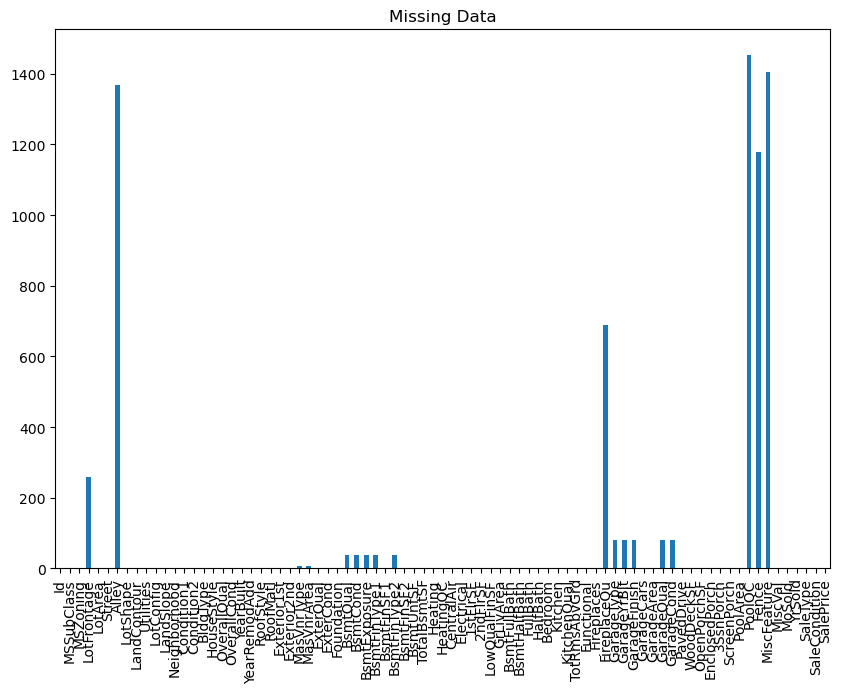

In [6]:
data.isnull().sum().plot(kind='bar',figsize=(10,7), title='Missing Data')

#### we will drop columns that have a high percentage of null values (more than 80%)

In [7]:
per =list(data.isnull().sum()/len(data)*100) 
print(per)

[0.0, 0.0, 0.0, 17.73972602739726, 0.0, 0.0, 93.76712328767123, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.547945205479452, 0.547945205479452, 0.0, 0.0, 0.0, 2.5342465753424657, 2.5342465753424657, 2.6027397260273974, 2.5342465753424657, 0.0, 2.6027397260273974, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0684931506849315, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 47.26027397260274, 5.5479452054794525, 5.5479452054794525, 5.5479452054794525, 0.0, 0.0, 5.5479452054794525, 5.5479452054794525, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 99.52054794520548, 80.75342465753424, 96.30136986301369, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


#### These have much null values: Alley , PoolQC , Fence , MiscFeature
#### So, we will drop them.

In [8]:
data = data.drop(['Alley' , 'PoolQC' , 'Fence' , 'MiscFeature'], axis = 1)

In [9]:
data.shape

(1460, 77)

## Unique Values

In [10]:
uni = data.apply(lambda x : x.unique())
uni

Id               [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
MSSubClass       [60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...
MSZoning                                 [RL, RM, C (all), FV, RH]
LotFrontage      [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...
LotArea          [8450, 9600, 11250, 9550, 14260, 14115, 10084,...
                                       ...                        
MoSold                     [2, 5, 9, 12, 10, 8, 11, 4, 1, 7, 3, 6]
YrSold                              [2008, 2007, 2006, 2009, 2010]
SaleType         [WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ...
SaleCondition    [Normal, Abnorml, Partial, AdjLand, Alloca, Fa...
SalePrice        [208500, 181500, 223500, 140000, 250000, 14300...
Length: 77, dtype: object

#### print the unique values in each column to understand the above output more clearly

In [11]:
for i in data.columns:
    print (i , ":", data[i].unique())
    print (" _ "*40)

Id : [   1    2    3 ... 1458 1459 1460]
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
MSSubClass : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']
 _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _  _ 
LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  5

#### "Id" column has no importance making the decision and has only unique values.
#### We will drop it.

In [12]:
data = data.drop('Id', axis = 1)

In [13]:
data.shape

(1460, 76)

## Generating a separate dataset for numerical and categorical variables

In [14]:
num_data = data.select_dtypes(include = 'number')

In [15]:
cat_data = data.select_dtypes(include = 'object')

### Numerical data:

In [16]:
num_data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

In [17]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [18]:
num_data.shape

(1460, 37)

### Categorical data:

In [19]:
cat_data.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      CollgCr       Norm       Norm  ...          Gd        Typ         NaN   
1      Veenker      Feedr       Norm  ...          TA        Typ          TA   
2      CollgCr       Norm       Norm  ...          Gd        Typ          TA   
3      Crawfor       Norm       Norm  ...          Gd        Typ          Gd   
4      NoRidge       Norm       Norm  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 39 columns]

In [20]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1452 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [21]:
cat_data.shape

(1460, 39)

## EDA of numerical variables:

### Missing value treatment

In [22]:
num_data.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
Bedroom            0
Kitchen            0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

<AxesSubplot:title={'center':'Missing Numerical Data'}>

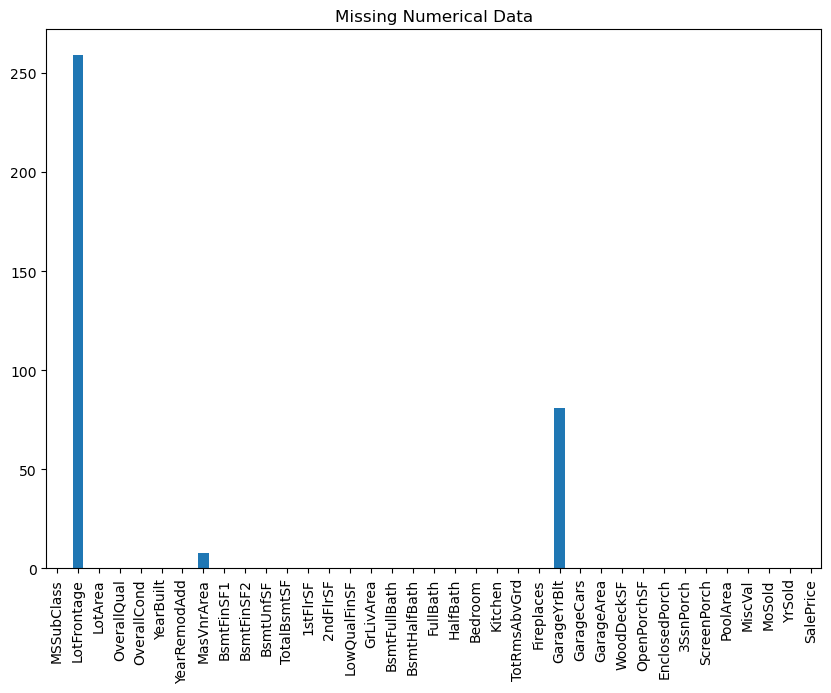

In [23]:
num_data.isnull().sum().plot(kind='bar',figsize=(10,7), title='Missing Numerical Data')

###### Observations:
    - LotFrontage , MasVnrArea , GarageYrBlt have null values 
    - Null values in MasVnrArea and GarageYrBlt seem to be littel. can be dropped rowwise.
    - Null values in LotFrontage seem to be much. can be treated

In [24]:
num_data['MasVnrArea'].isnull().sum()/len(num_data['MasVnrArea'])*100

0.547945205479452

In [25]:
num_data['GarageYrBlt'].isnull().sum()/len(num_data['GarageYrBlt'])*100

5.5479452054794525

#### Null values in MasVnrArea and GarageYrBlt will be dropped rowwise.

In [26]:
num_data= num_data.dropna(axis=0, subset=['MasVnrArea','GarageYrBlt'])

In [27]:
num_data.shape

(1371, 37)

In [28]:
num_data.isnull().sum()

MSSubClass         0
LotFrontage      250
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
Bedroom            0
Kitchen            0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

#### Coming to LotFrontage ..

In [29]:
num_data['LotFrontage'].isnull().sum()/len(num_data['LotFrontage'])*100

18.234865061998544

###### Observations:
    - Cannot just drop rows with missing values in LotFrontage because they are so many.
    - We will treat them.
    - But first, we want to see how data look like.

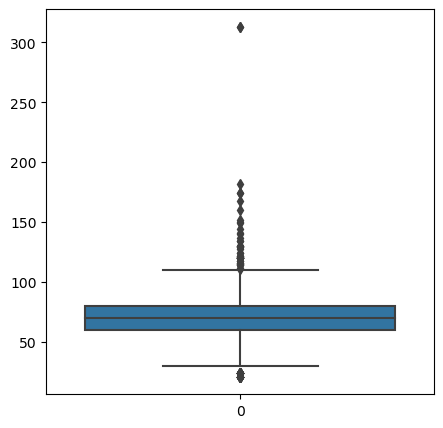

In [30]:
plt.figure(figsize=(5,5))
sns.boxplot(data=num_data['LotFrontage'])
plt.show()

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

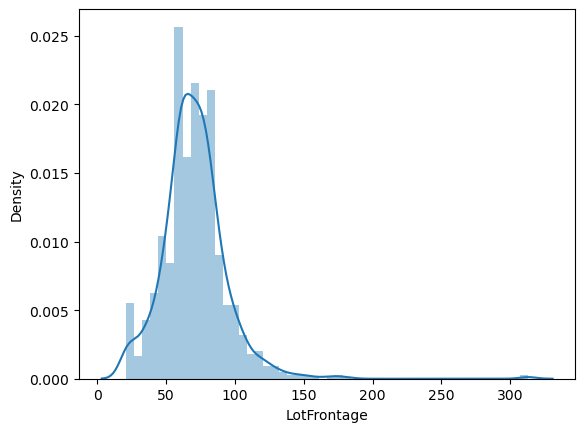

In [31]:
sns.distplot(num_data['LotFrontage'])

###### Observations:
    - Data is not normally distributed.
    - Cannot fill missing values with mean.
    - Will fill missing values with median.

In [32]:
num_data['LotFrontage']=num_data['LotFrontage'].fillna(num_data['LotFrontage'].median())

In [33]:
num_data.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
Bedroom          0
Kitchen          0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

#### Now, no missing data present in numerical data

<AxesSubplot:title={'center':'Missing Numerical Data'}>

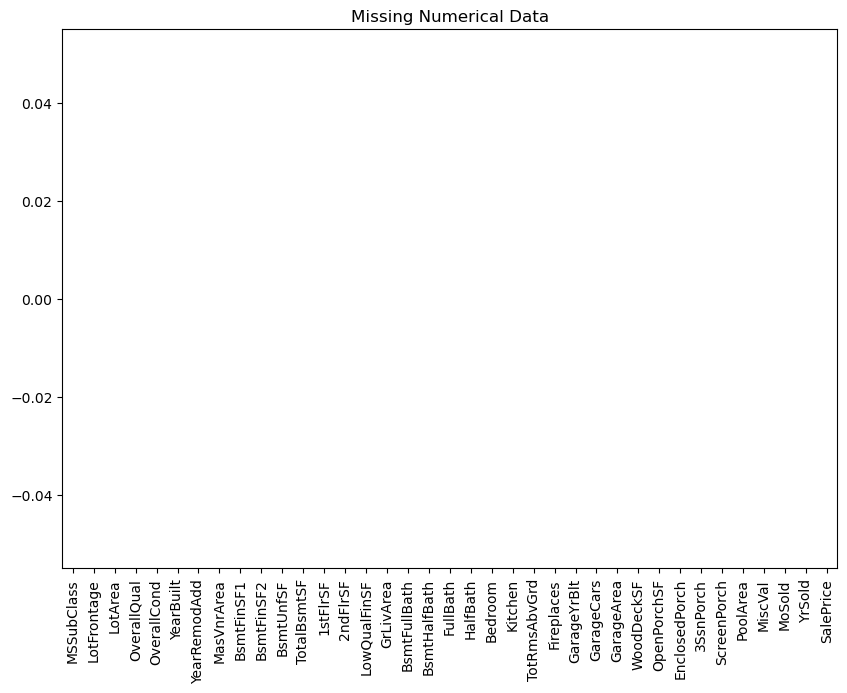

In [34]:
num_data.isnull().sum().plot(kind='bar',figsize=(10,7), title='Missing Numerical Data')

## Identify the skewness and distribution

### Basic information about the numerical data:

In [35]:
num_data = pd.DataFrame(num_data)  
    
num_data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1371.000000  1371.000000    1371.000000  1371.000000  1371.000000   
mean     56.072210    70.544128   10686.740336     6.180890     5.582057   
std      41.063631    21.942760   10224.805648     1.344125     1.081199   
min      20.000000    21.000000    1300.000000     2.000000     2.000000   
25%      20.000000    60.000000    7734.000000     5.000000     5.000000   
50%      50.000000    70.000000    9591.000000     6.000000     5.000000   
75%      70.000000    79.000000   11708.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1371.000000   1371.000000  1371.000000  1371.000000  1371.000000  ...   
mean   1972.808169   1985.342815   108.997082   453.880379    48.382932  ...   
std      29.374036     20.453845   184.545459   458.982153   164.762510  ...   
min    1880.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1955.000000   1967.500000     0.000000     0.000000     0.000000  ...   
50%    1975.000000   1994.000000     0.000000   399.000000     0.000000  ...   
75%    2001.000000   2004.000000   171.500000   728.000000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1371.000000  1371.000000    1371.000000  1371.000000  1371.000000   
mean     97.657914    46.994165      21.016047     3.630926    16.038658   
std     126.759726    64.983737      60.500067    30.241332    57.403495   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    27.000000       0.000000     0.000000     0.000000   
75%     171.000000    69.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1371.000000   1371.000000  1371.000000  1371.000000    1371.000000  
mean      2.938001     43.139314     6.330416  2007.811816  185181.890591  
std      41.455453    503.065627     2.692423     1.331112   78872.352654  
min       0.000000      0.000000     1.000000  2006.000000   35311.000000  
25%       0.000000      0.000000     5.000000  2007.000000  133950.000000  
50%       0.000000      0.000000     6.000000  2008.000000  167000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  217750.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

### Skewness of numerical data: 

In [36]:
num_data.skew(axis = 0, skipna = True)

MSSubClass        1.379671
LotFrontage       2.505088
LotArea          12.043104
OverallQual       0.285578
OverallCond       0.870498
YearBuilt        -0.654857
YearRemodAdd     -0.537551
MasVnrArea        2.592268
BsmtFinSF1        1.696254
BsmtFinSF2        4.180659
BsmtUnfSF         0.928666
TotalBsmtSF       1.631512
1stFlrSF          1.387422
2ndFlrSF          0.787472
LowQualFinSF     10.680735
GrLivArea         1.419429
BsmtFullBath      0.497182
BsmtHalfBath      3.904084
FullBath         -0.016384
HalfBath          0.587135
Bedroom          -0.007256
Kitchen           5.136755
TotRmsAbvGrd      0.676151
Fireplaces        0.584886
GarageYrBlt      -0.643568
GarageCars        0.197088
GarageArea        0.813444
WoodDeckSF        1.504864
OpenPorchSF       2.267120
EnclosedPorch     3.219890
3SsnPorch         9.977280
ScreenPorch       3.973432
PoolArea         14.363911
MiscVal          24.769100
MoSold            0.207531
YrSold            0.096562
SalePrice         1.936451
d

### Plotting skewness and distribution of numerical data:

In [37]:
skew = num_data.skew(axis = 0, skipna = True)

MSSubClass 1.379670666199894


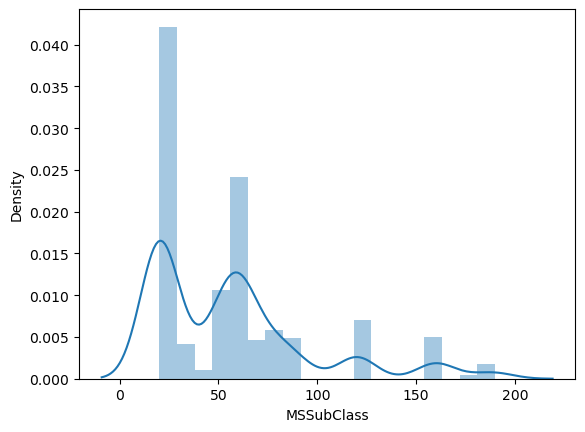

LotFrontage 2.5050879107546424


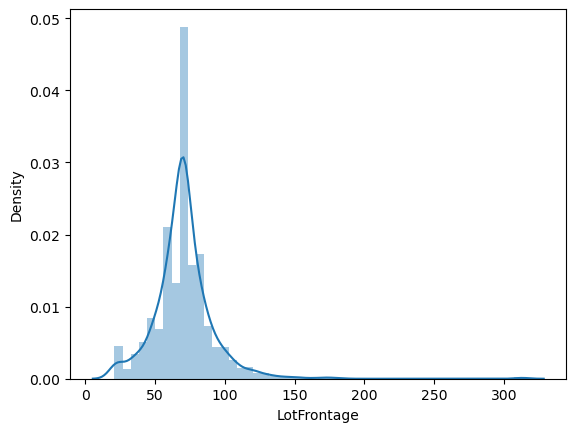

LotArea 12.043103755007486


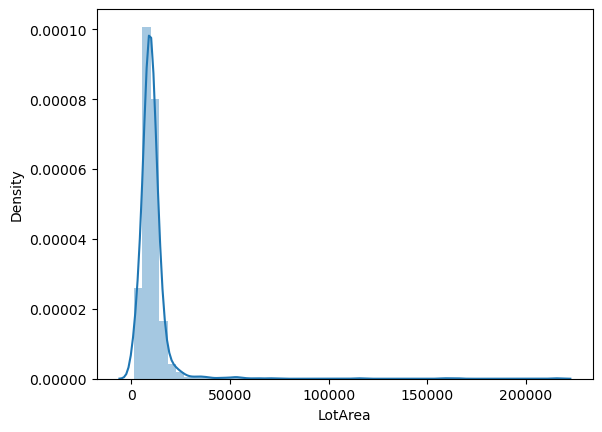

OverallQual 0.28557802559601464


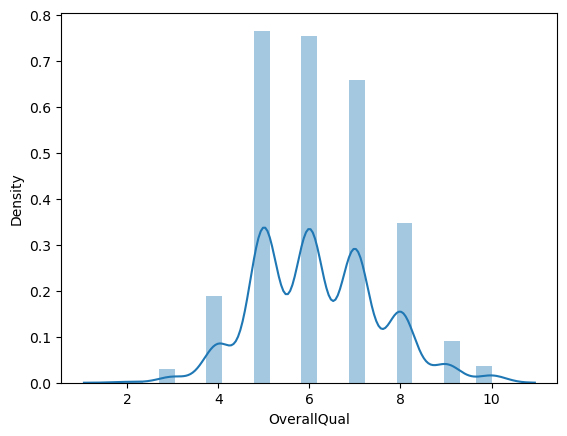

OverallCond 0.8704976520590717


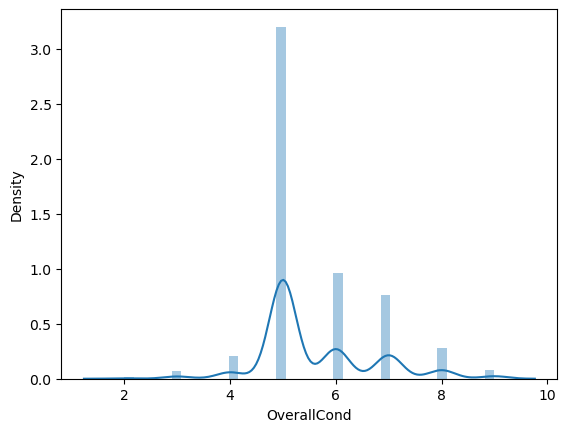

YearBuilt -0.6548569743166831


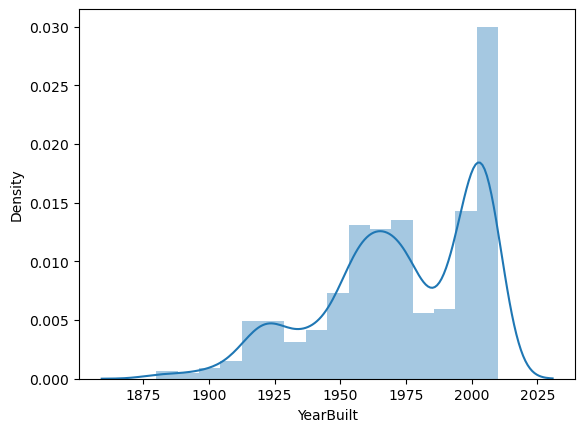

YearRemodAdd -0.5375508418019244


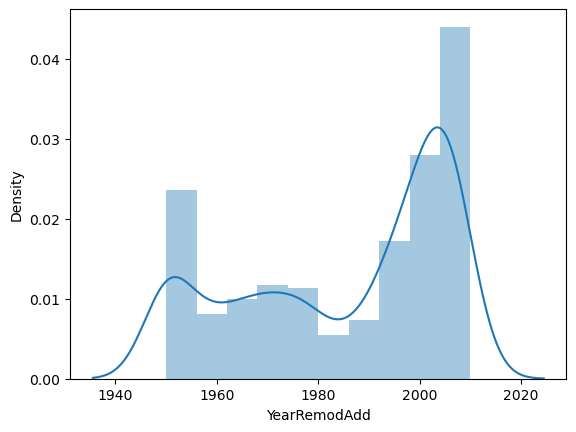

MasVnrArea 2.5922677881148415


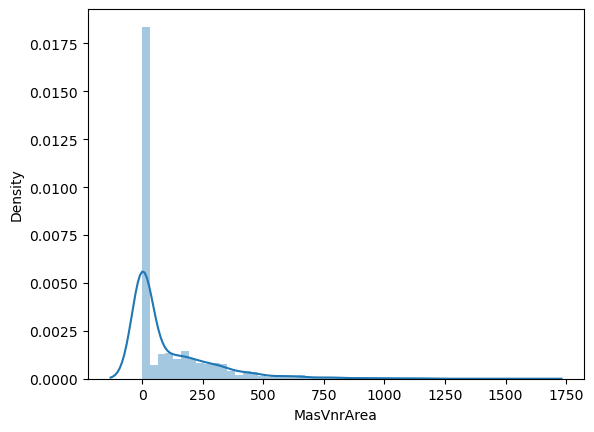

BsmtFinSF1 1.6962540814029528


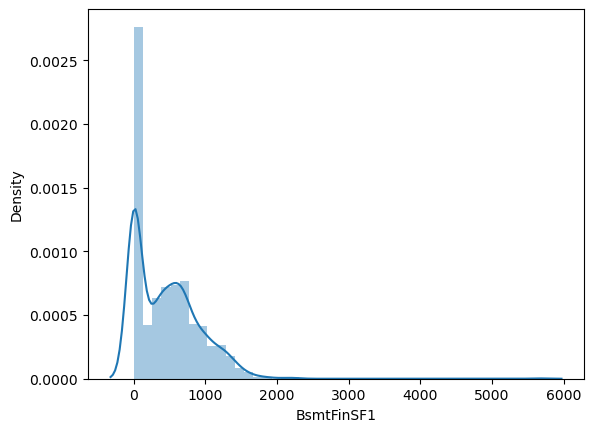

BsmtFinSF2 4.180658818114731


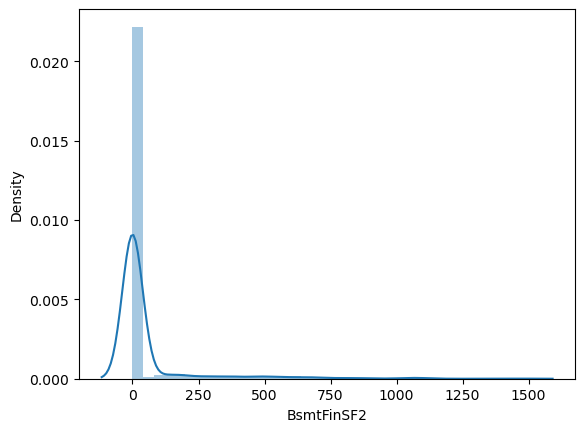

BsmtUnfSF 0.9286657613667821


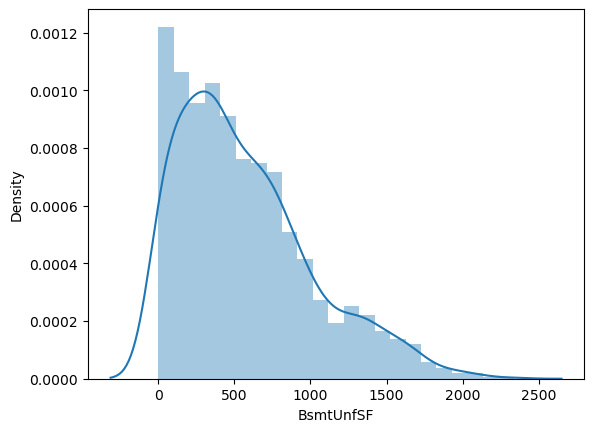

TotalBsmtSF 1.631512081366053


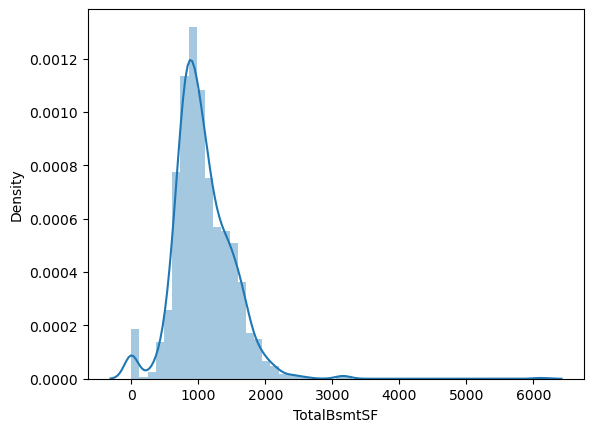

1stFlrSF 1.3874218110229752


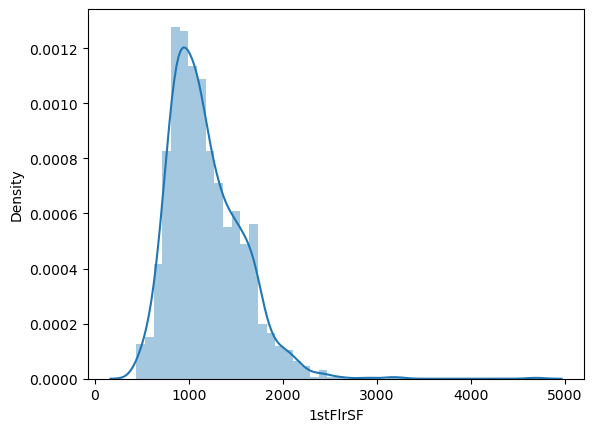

2ndFlrSF 0.7874724362242673


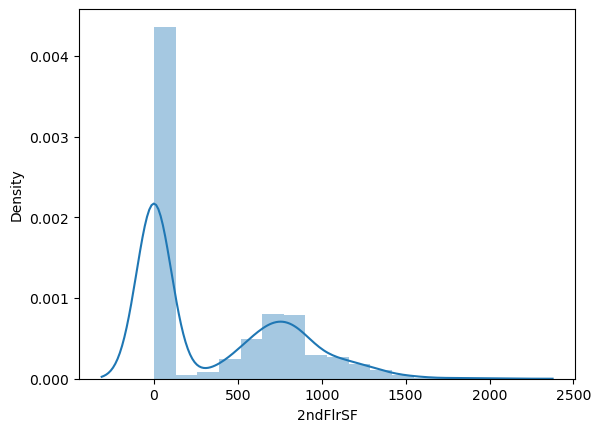

LowQualFinSF 10.680735132657768


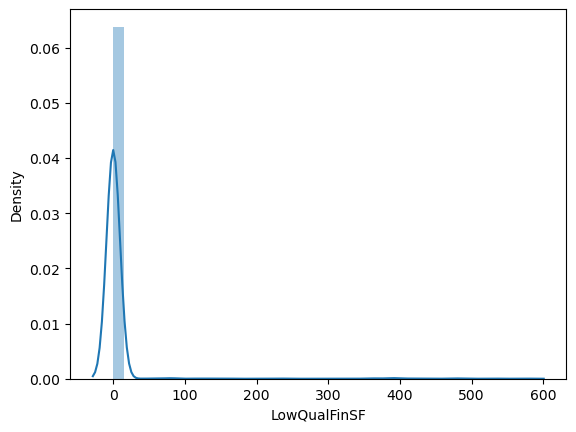

GrLivArea 1.419429437590681


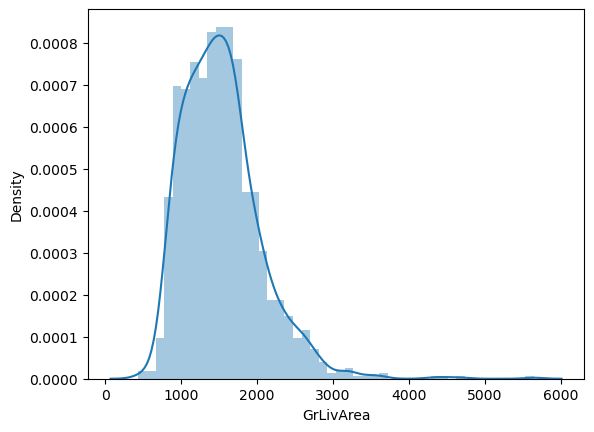

BsmtFullBath 0.4971815229827064


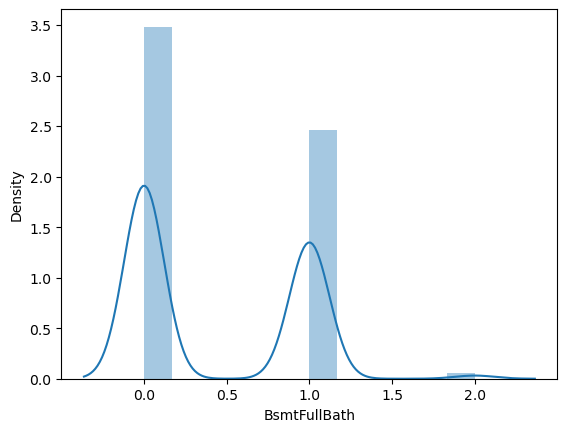

BsmtHalfBath 3.9040836873575935


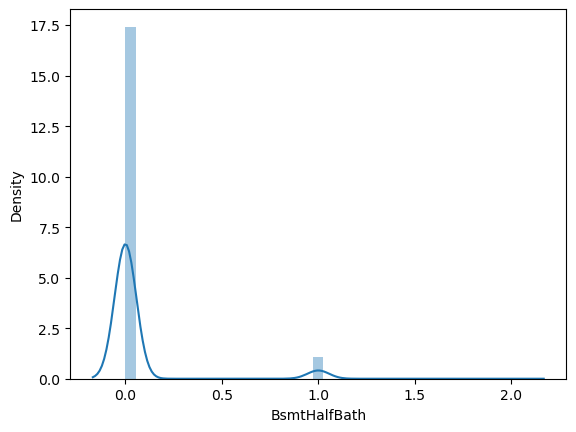

FullBath -0.016384007991193463


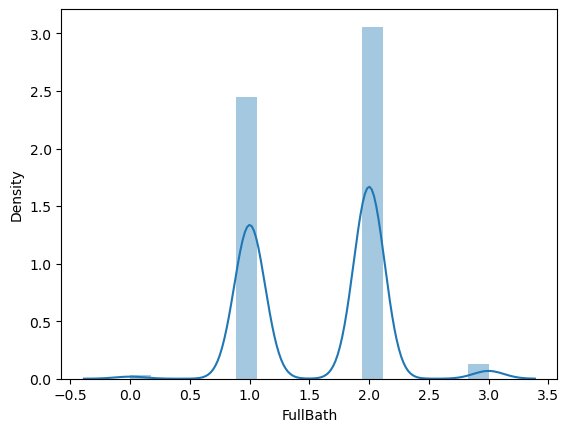

HalfBath 0.5871350481702793


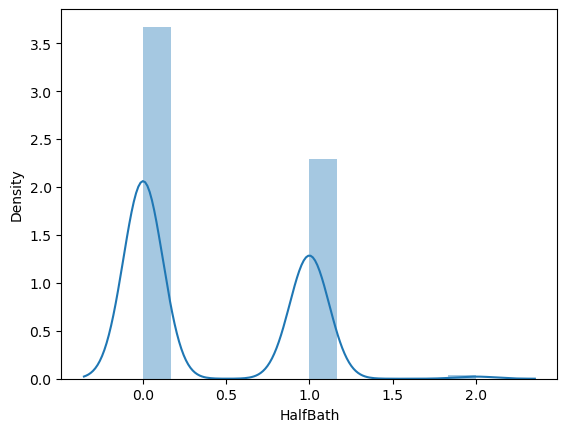

Bedroom -0.0072559226482361945


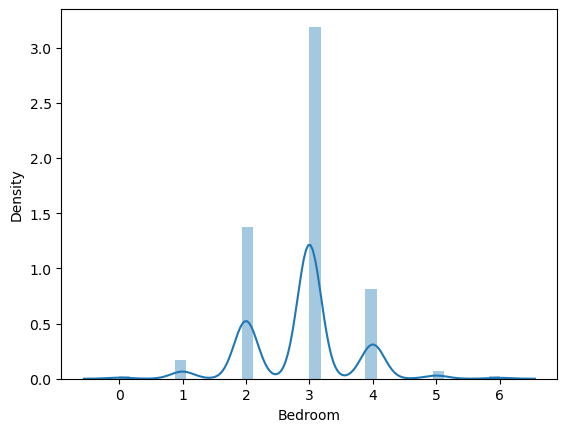

Kitchen 5.136754802321057


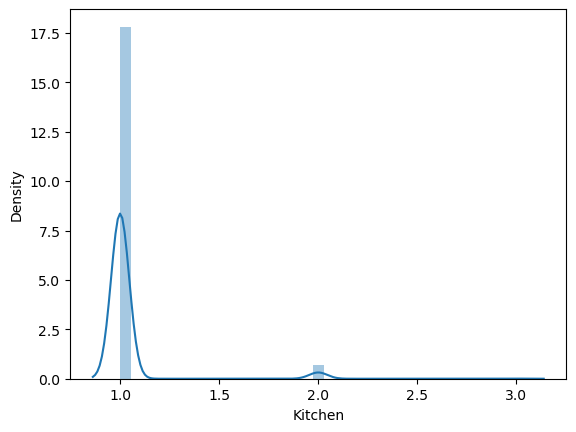

TotRmsAbvGrd 0.6761511421525465


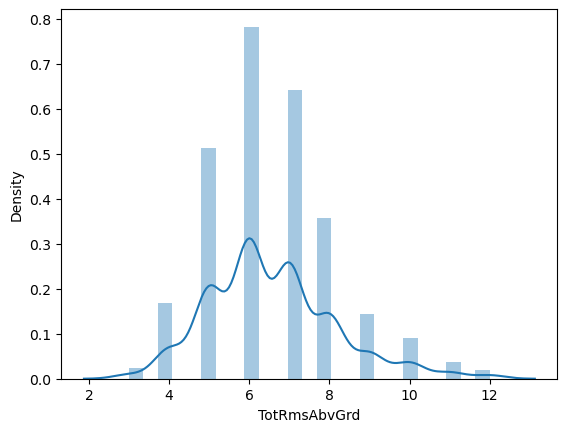

Fireplaces 0.5848864058520733


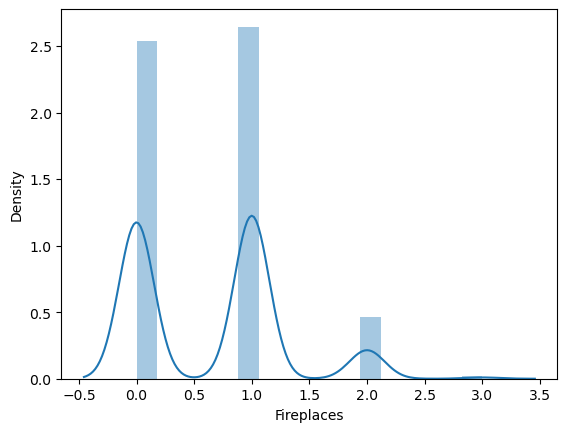

GarageYrBlt -0.6435678002163584


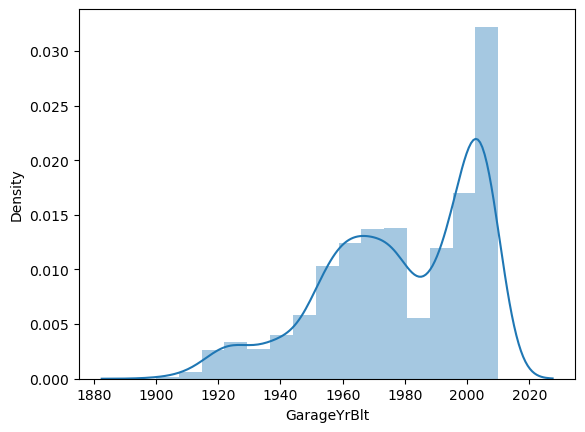

GarageCars 0.19708799885432812


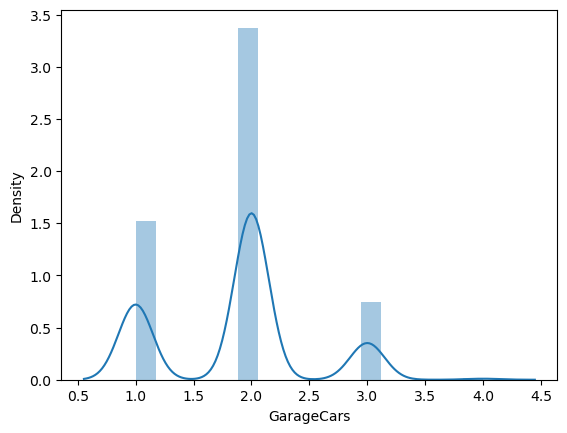

GarageArea 0.8134435583046412


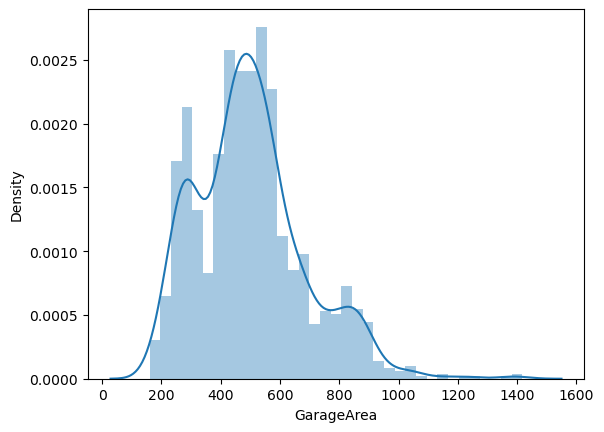

WoodDeckSF 1.5048644527523922


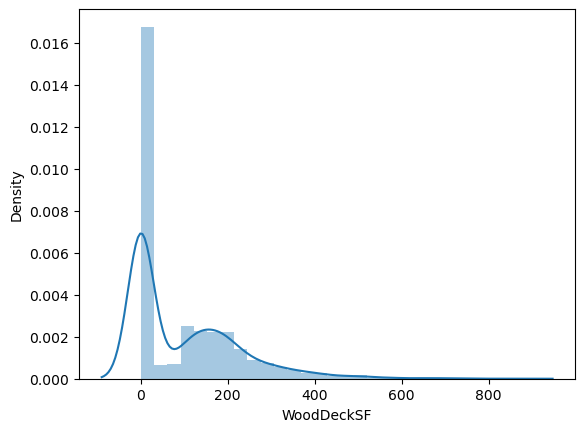

OpenPorchSF 2.2671196754409233


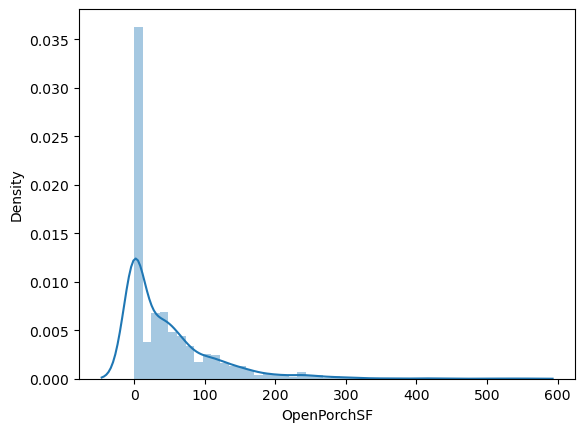

EnclosedPorch 3.2198897154341557


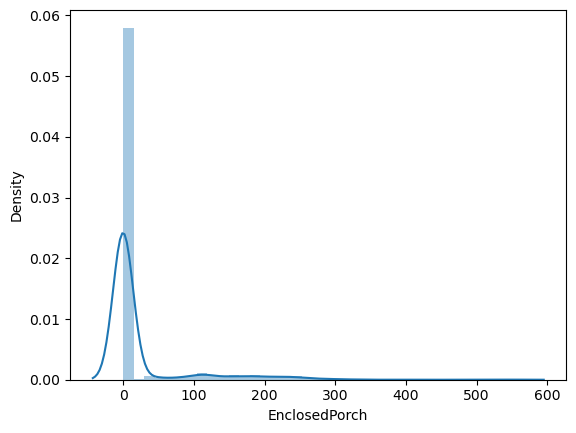

3SsnPorch 9.977279502037891


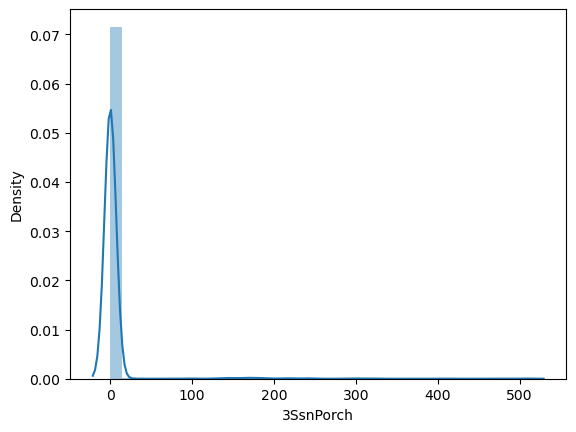

ScreenPorch 3.973432460427483


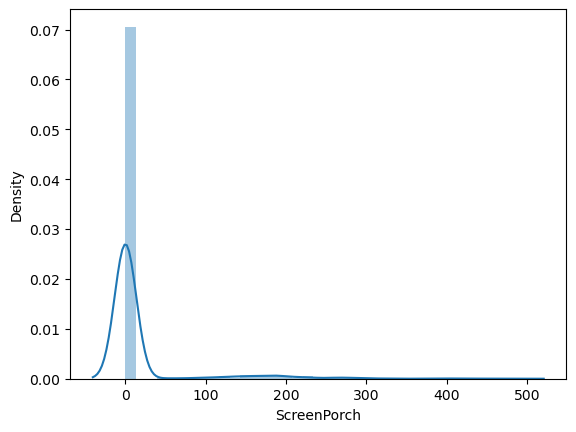

PoolArea 14.36391148412907


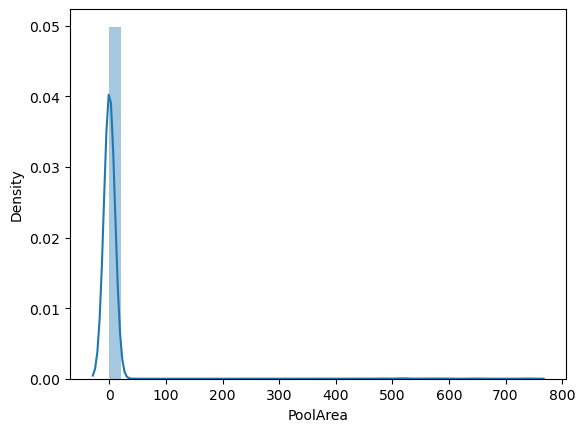

MiscVal 24.769100388074786


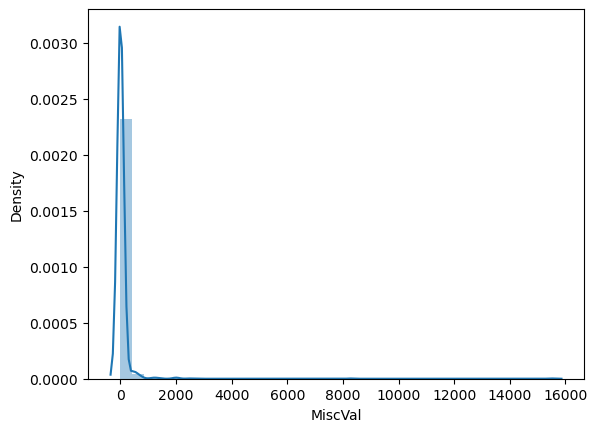

MoSold 0.20753125181318857


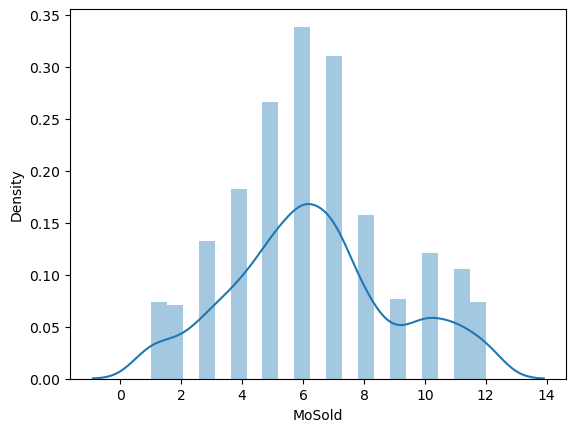

YrSold 0.09656184269039496


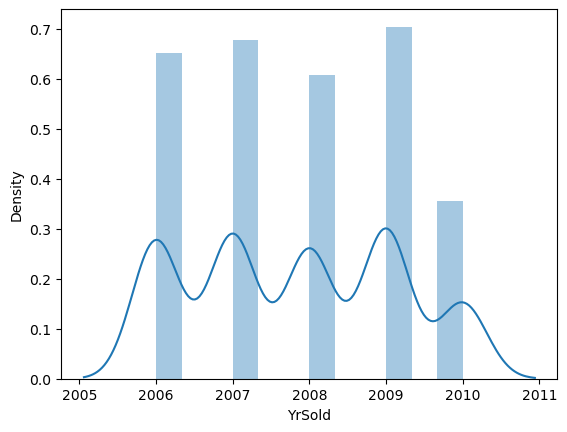

SalePrice 1.936451233050694


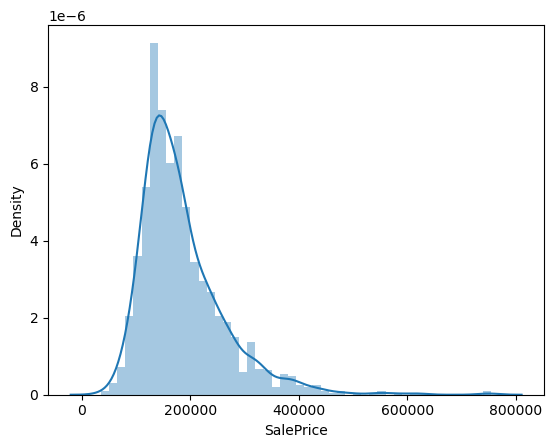

In [38]:
for col in num_data:
    print(col,skew[col])
    plt.figure()
    sns.distplot(num_data[col])
    plt.show()

###### Observations:
    - Numerical data does not seem normally distributed.


# Identifying significant variables using correlation matrix

<AxesSubplot:>

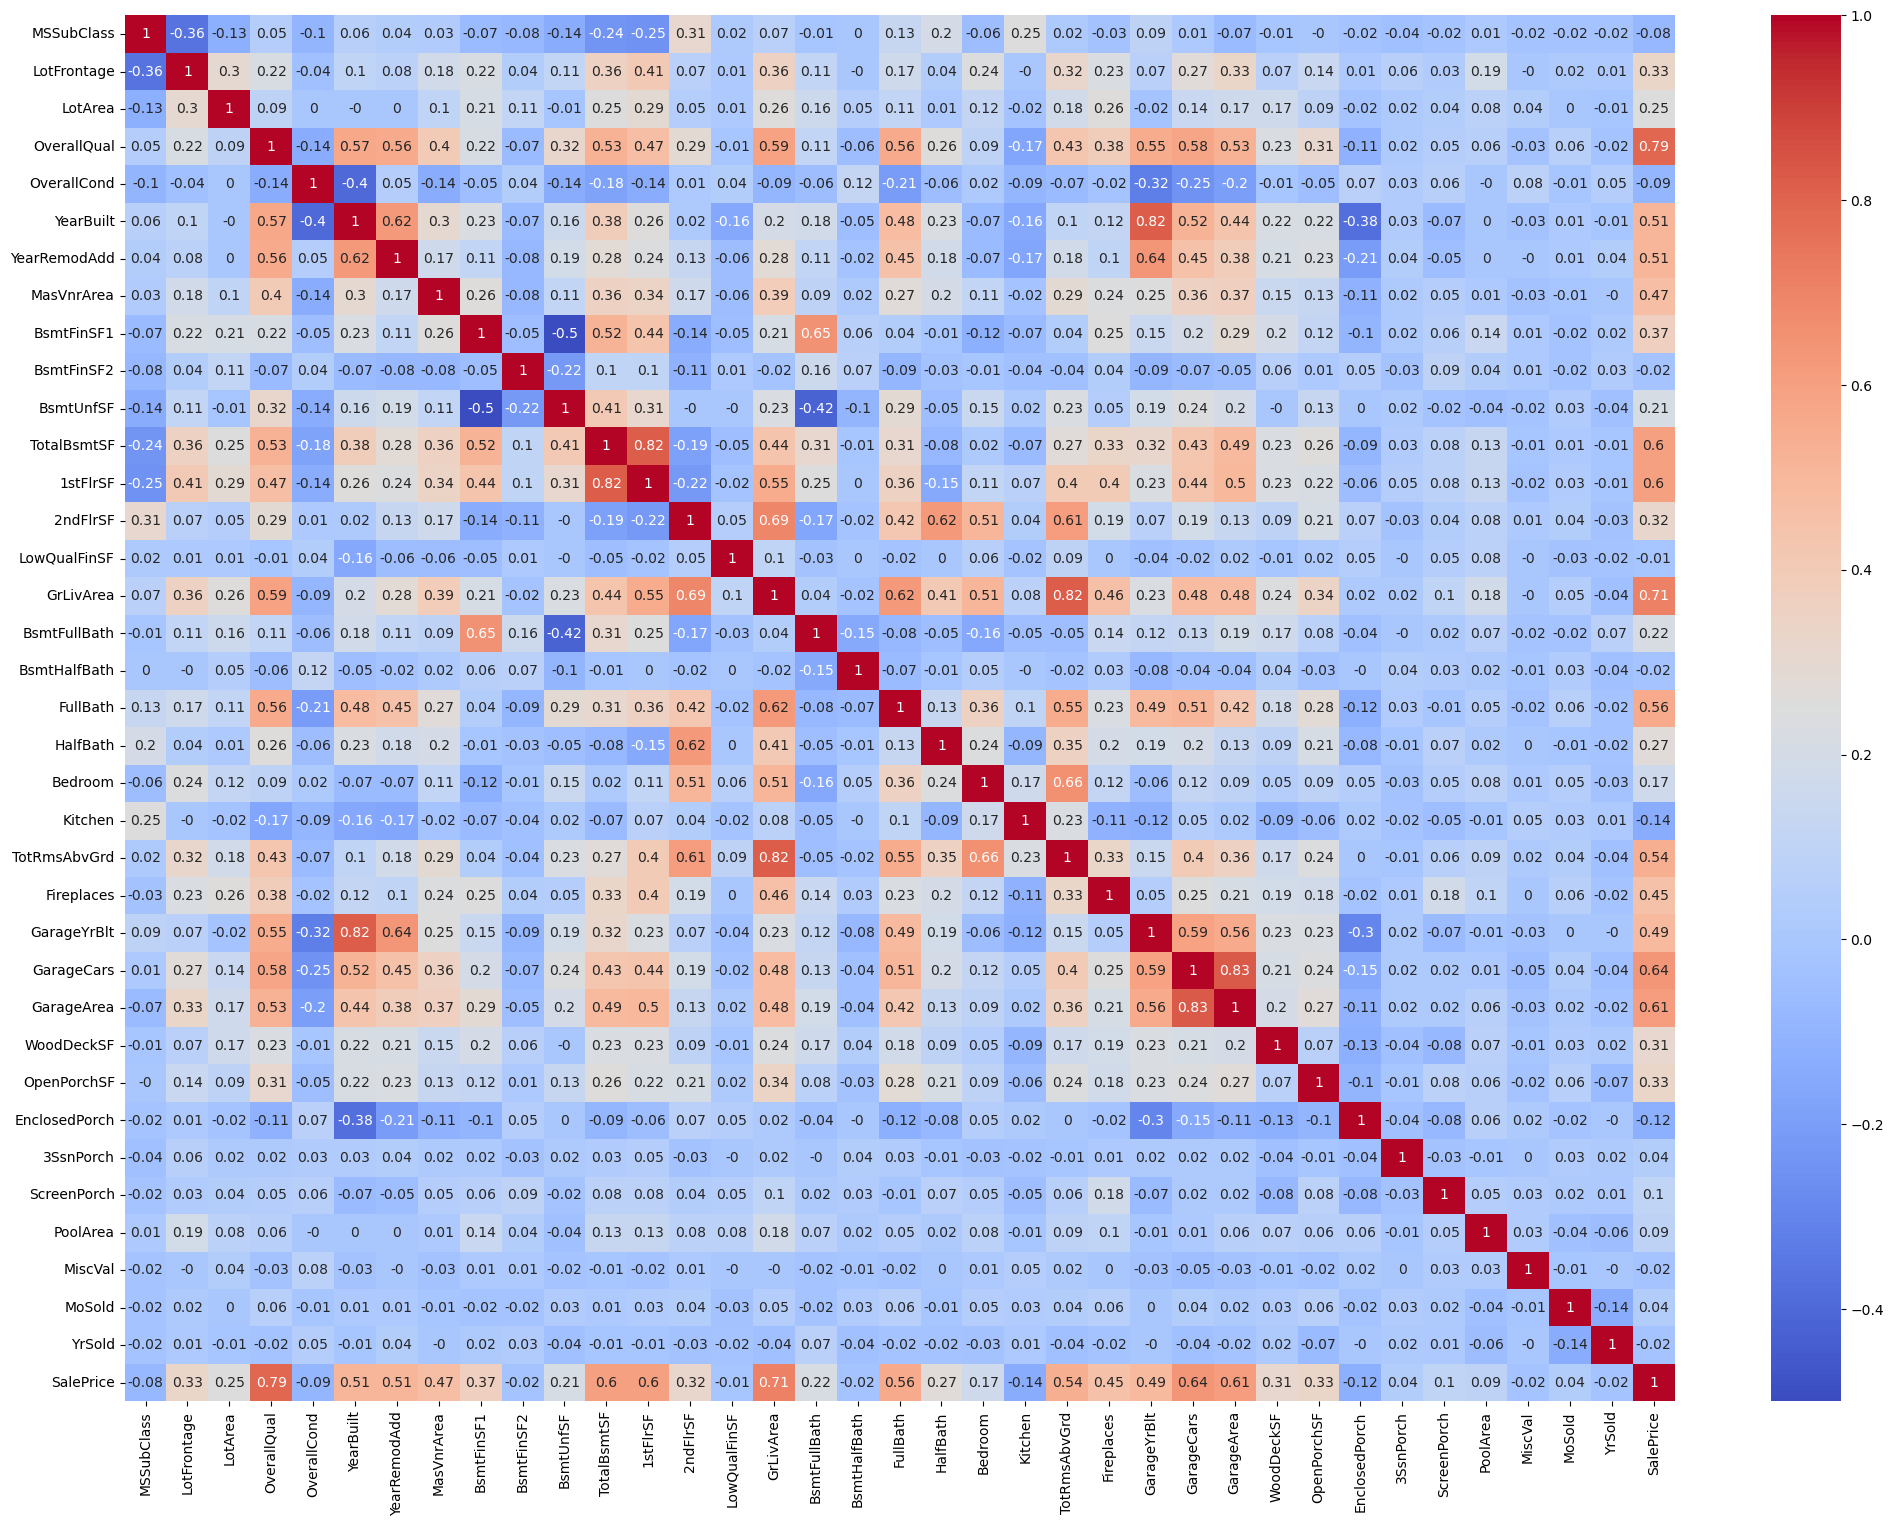

In [39]:
corr = num_data.corr().round(2)
plt.figure(figsize=(25,18))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Getting a list of variables that have high relation with SalePrice :
    

In [40]:
high= corr['SalePrice'][(corr['SalePrice'] >=0.5) | (corr['SalePrice'] <= -0.5)].index.tolist()
high

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

## create a separate dataset with only significant numerical values

In [41]:
sig_num_data = num_data[high]

In [42]:
sig_num_data.head()

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0            7       2003          2003          856       856       1710   
1            6       1976          1976         1262      1262       1262   
2            7       2001          2002          920       920       1786   
3            7       1915          1970          756       961       1717   
4            8       2000          2000         1145      1145       2198   

   FullBath  TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  
0         2             8           2         548     208500  
1         2             6           2         460     181500  
2         2             6           2         608     223500  
3         1             7           3         642     140000  
4         2             9           3         836     250000

## correlation matrix to minimize the number of significant variables

<AxesSubplot:>

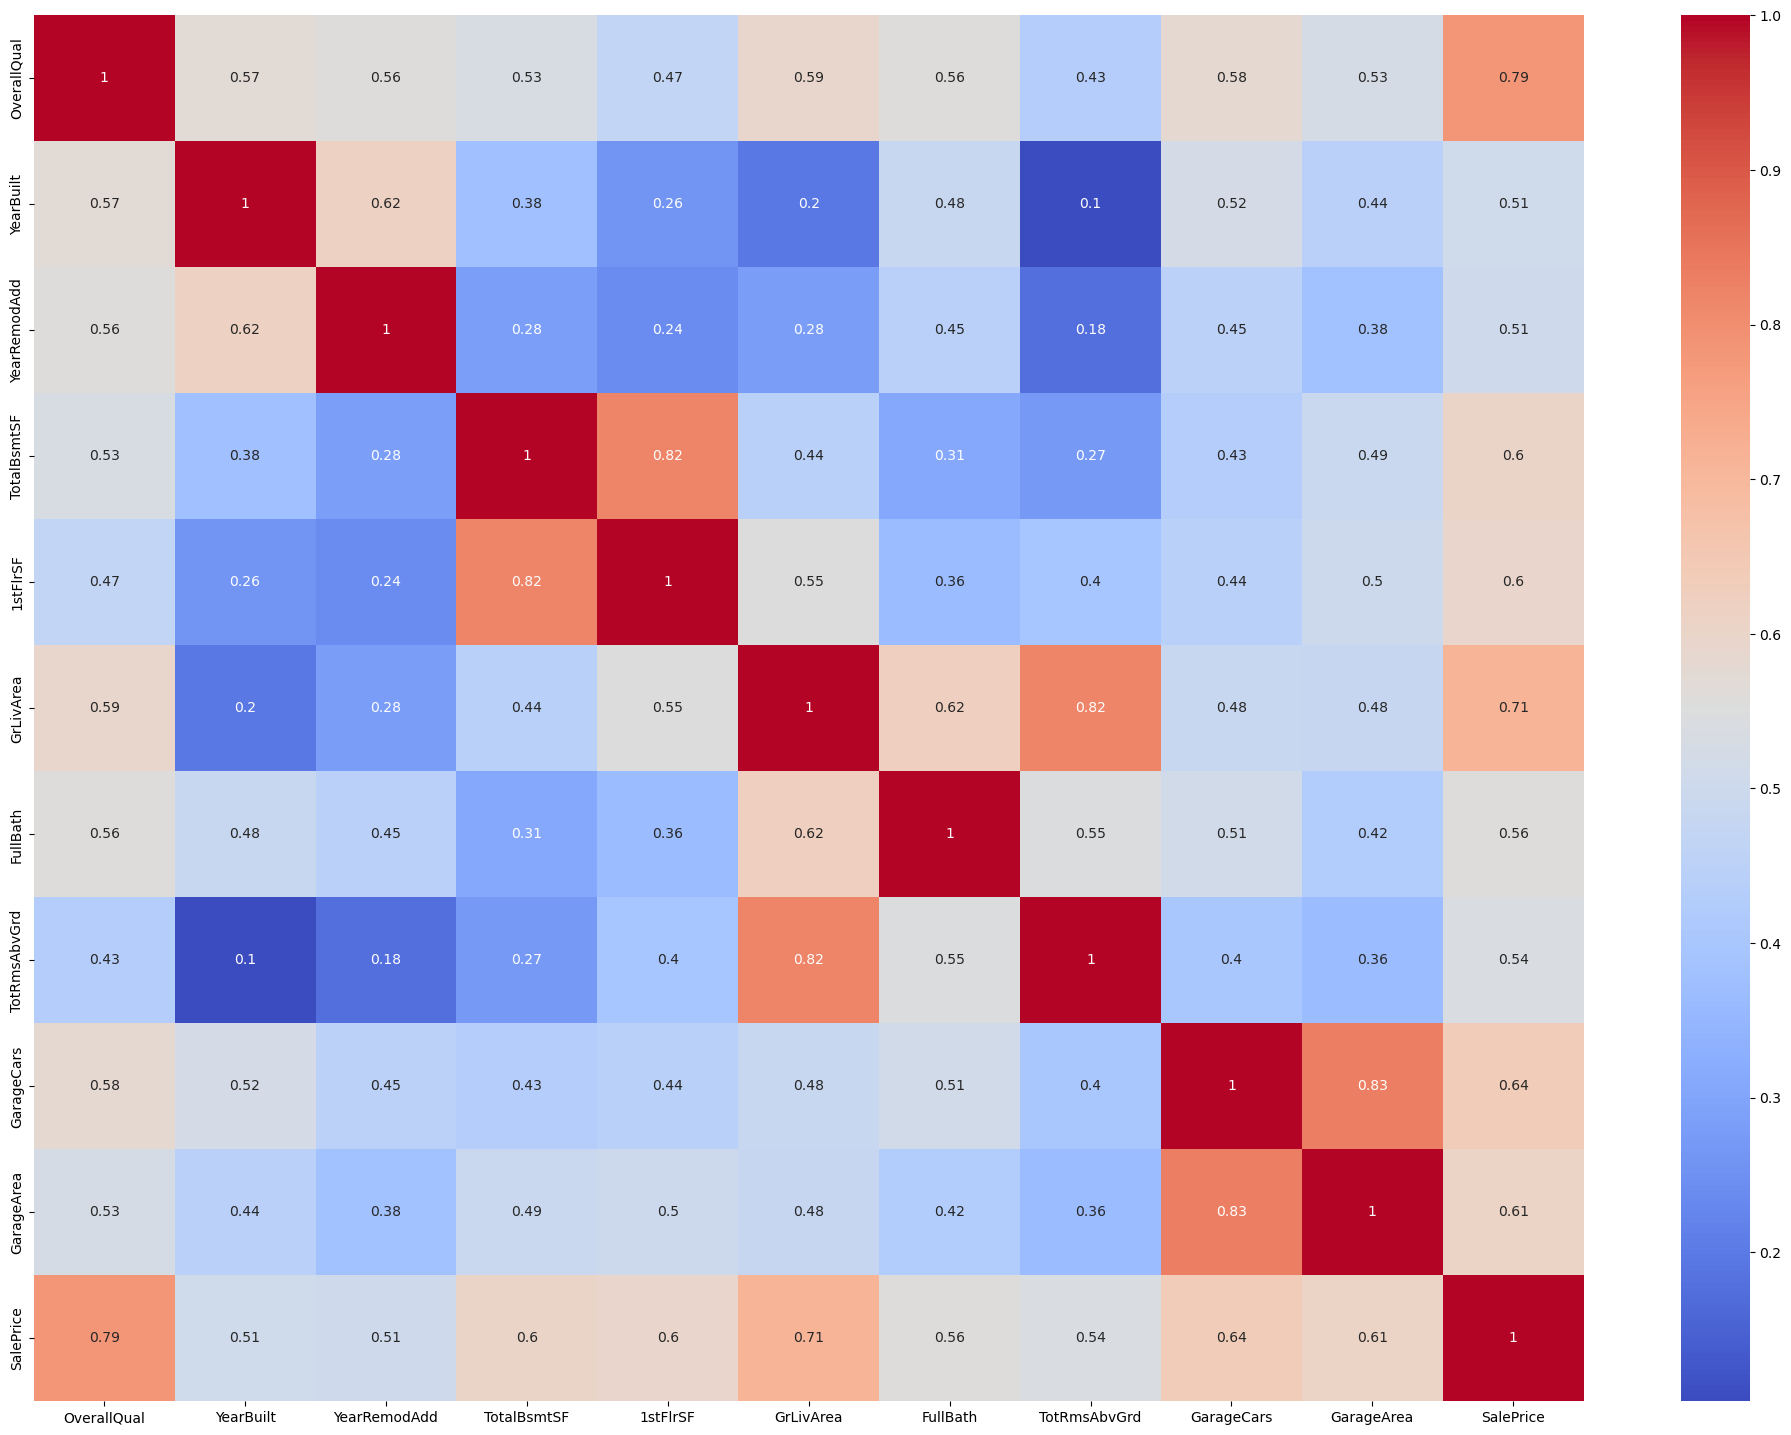

In [43]:
corr = sig_num_data.corr()
plt.figure(figsize=(25,18))
sns.heatmap(corr, annot=True, cmap='coolwarm')

#### We will check if these variables are highly correlated with each other (more than 60%). Then one of each will be enough.


### Observations:






    - 'YearBuilt'  has a high relation with 'YearRemodAdd'
    
######            'YearRemodAdd' can be deleted.
     
    - 'TotalBsmtSF' has a high relation with  '1stFlrSF'
    
######             '1stFlrSF' can be deleted.
    
    - 'GrLivArea'  has a high relation with 'TotRmsAbvGrd' and 'FullBath'
    
    
######                'TotRmsAbvGrd' and 'FullBath' can be deleted.
    
    - 'GarageCars' has a high relation with 'GarageArea'
    
######                  'GarageArea' can be daleted.

## These columns will be deleted:
## ['YearRemodAdd' , '1stFlrSF' , 'TotRmsAbvGrd' , 'FullBath', 'GarageArea']

In [44]:
sig_num_data.drop(columns=['YearRemodAdd' , '1stFlrSF' , 'TotRmsAbvGrd' , 'FullBath', 'GarageArea'], inplace=True)

## Read the final result of significant numerical data

In [45]:
sig_num_data.head()

OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  GarageCars  SalePrice
0            7       2003          856       1710           2     208500
1            6       1976         1262       1262           2     181500
2            7       2001          920       1786           2     223500
3            7       1915          756       1717           3     140000
4            8       2000         1145       2198           3     250000

## significant numerical variables :

In [46]:
sig_num_data.columns

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'SalePrice'],
      dtype='object')

## Pair plot for distribution and density

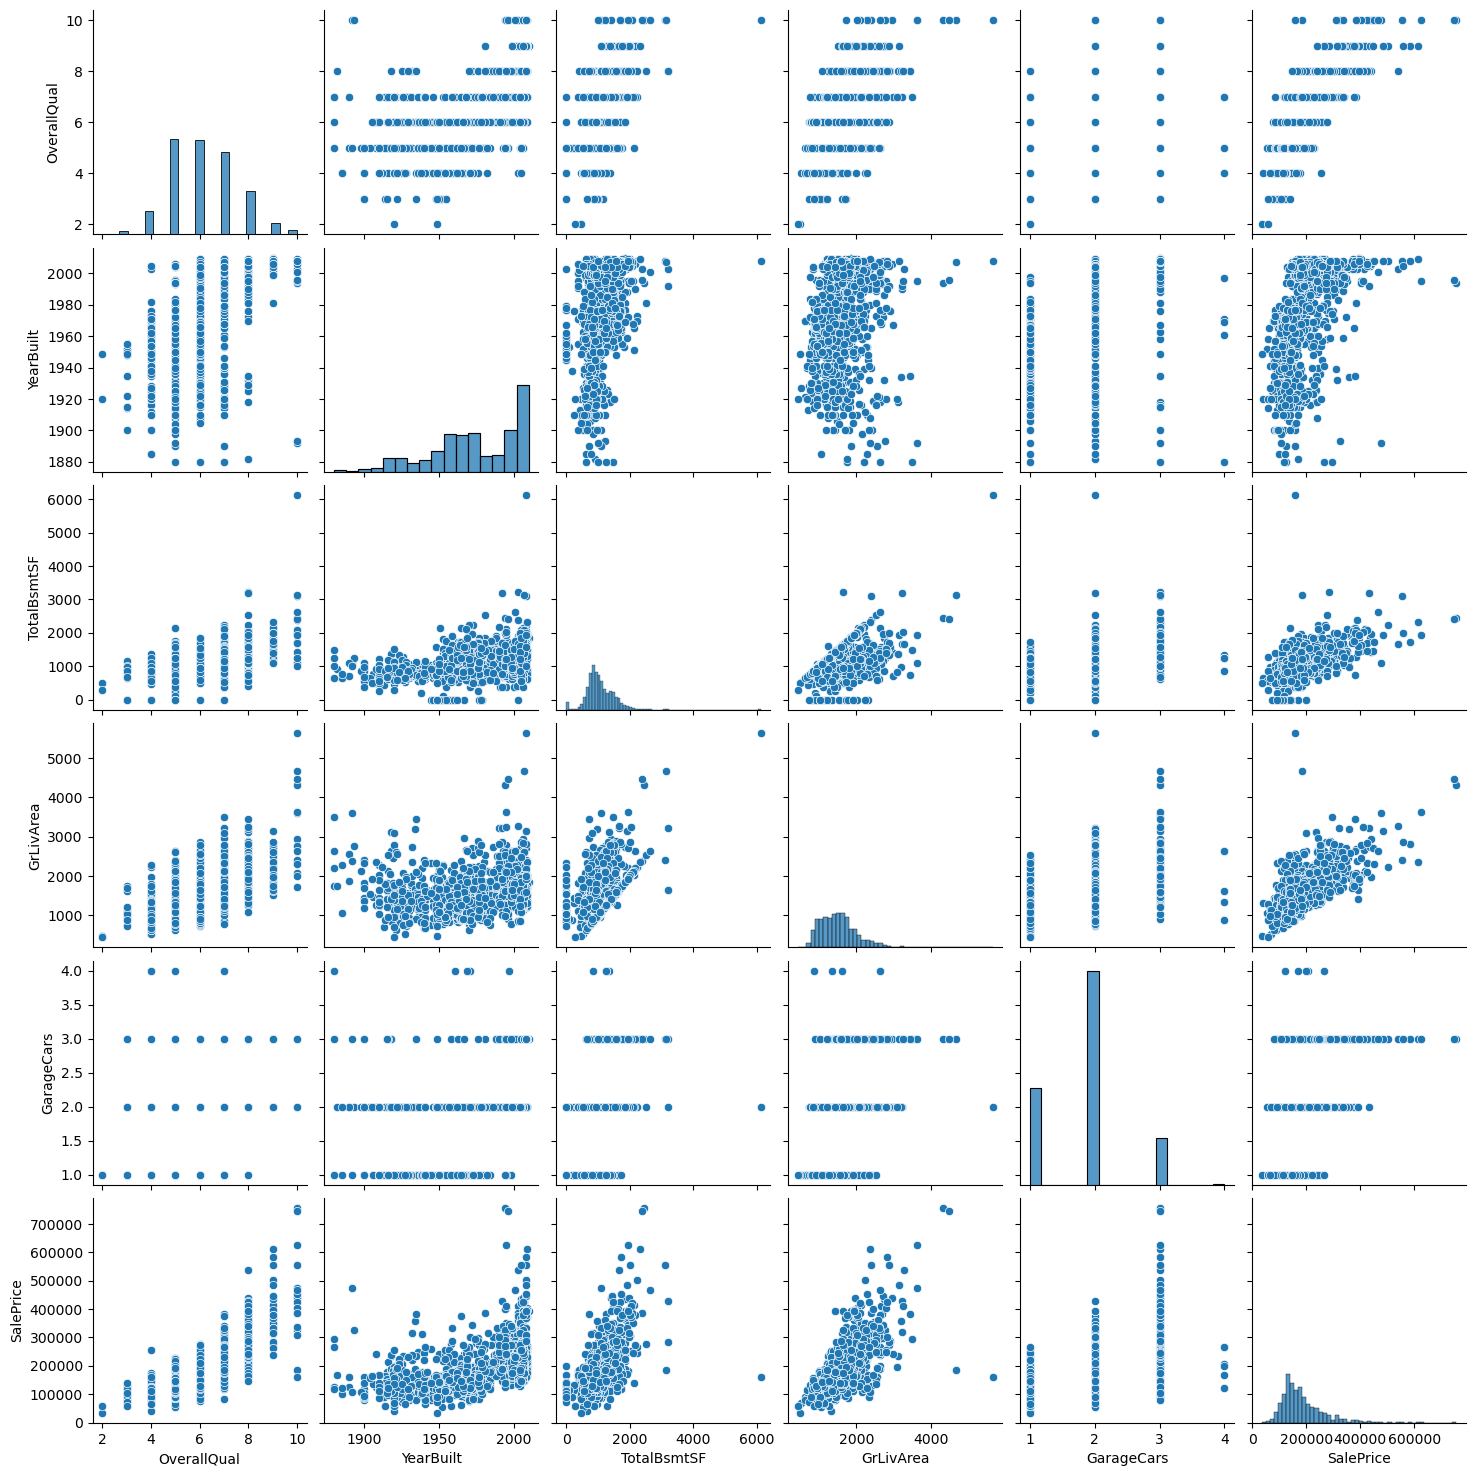

In [47]:
sns.pairplot(sig_num_data)

# EDA of categorical variables:

## Missing value treatment

In [48]:
cat_data.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

### percentage of missing values in each column

In [49]:
cat_data.isnull().sum()/len(cat_data)*100

MSZoning          0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
PavedDrive        0.000000
S

### observation:

    - 'FireplaceQu' has high percentage of null values
    - 'FireplaceQu' this column can be deleted.

    - 'MasVnrType', 'BsmtQual' , 'BsmtCond' , 'BsmtExposure', 'BsmtFinType1' , 'BsmtFinType2'  
      'GarageType' , 'GarageFinish' , 'GarageQual' , 'GarageCond'
       have littel percentage of null values.
    -  Null values will be deleted rowwise.
   

In [50]:
cat_data = cat_data.drop(['FireplaceQu'], axis=1)

In [51]:
cat_data.dropna(inplace = True)

### Check if there still null values

In [52]:
cat_data.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

#### Now, no missing data present in categorical data

<AxesSubplot:title={'center':'Missing Categorical Data'}>

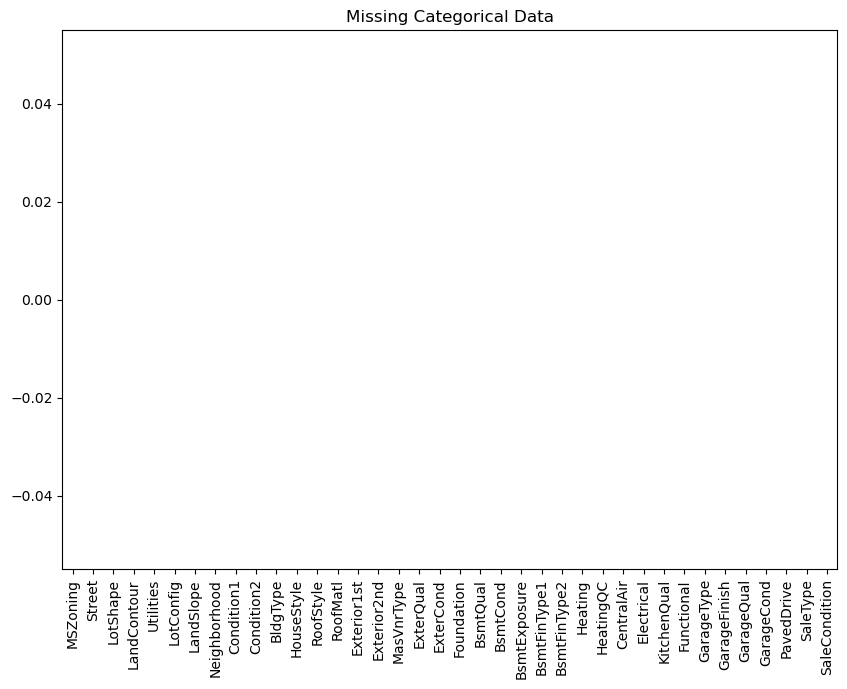

In [53]:
cat_data.isnull().sum().plot(kind='bar',figsize=(10,7), title='Missing Categorical Data')

### identify shape of categorical data

In [54]:
cat_data.shape

(1338, 38)

# Count plot for bivariate analysis

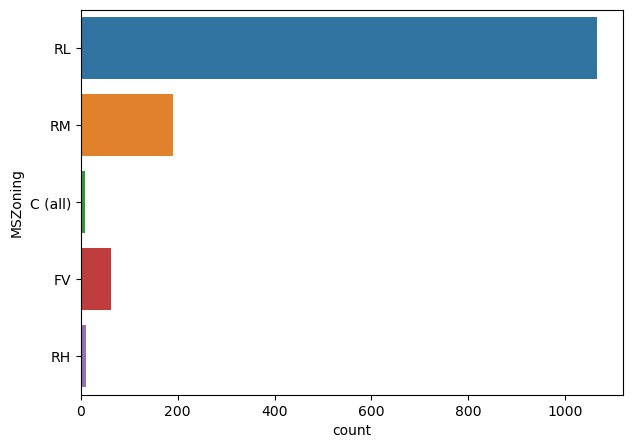

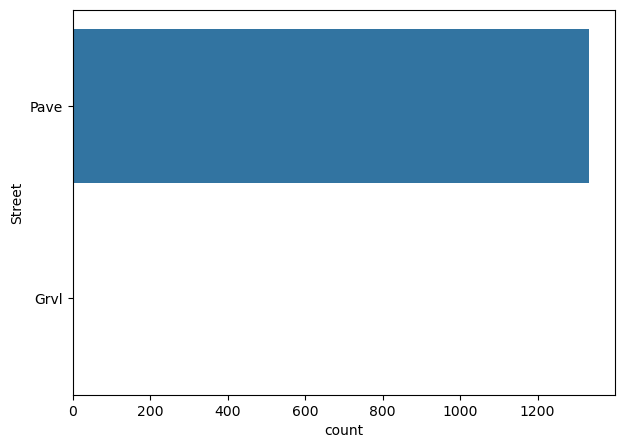

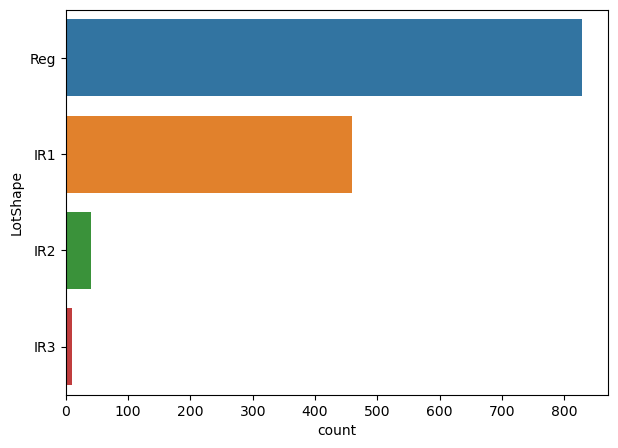

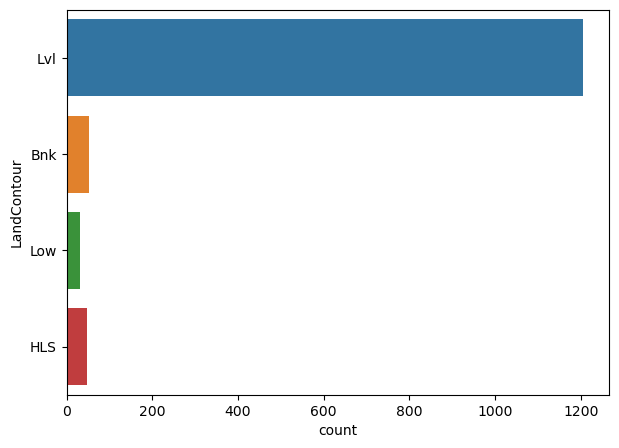

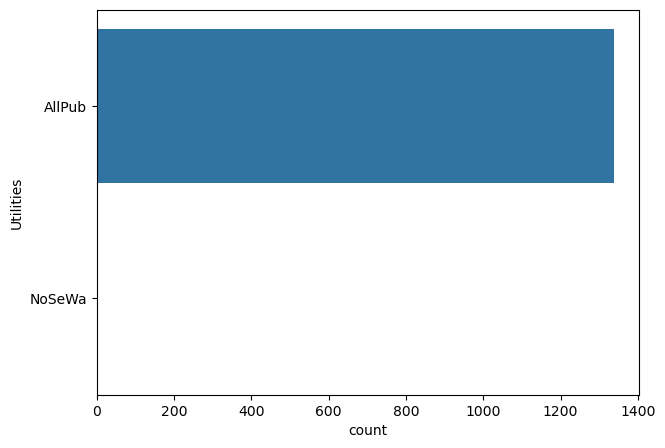

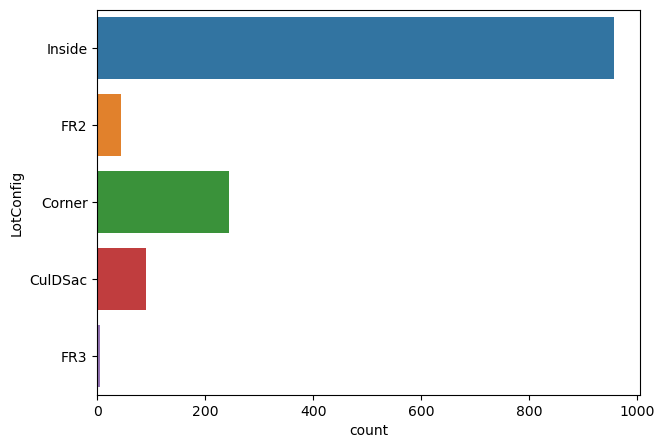

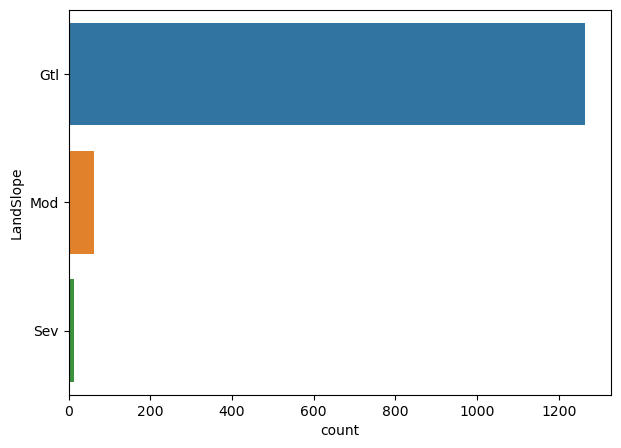

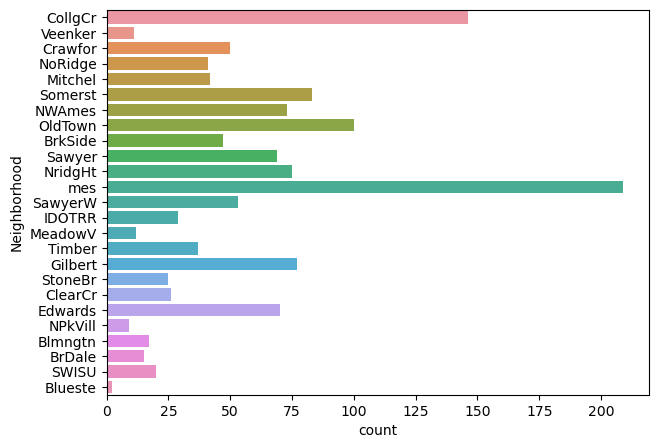

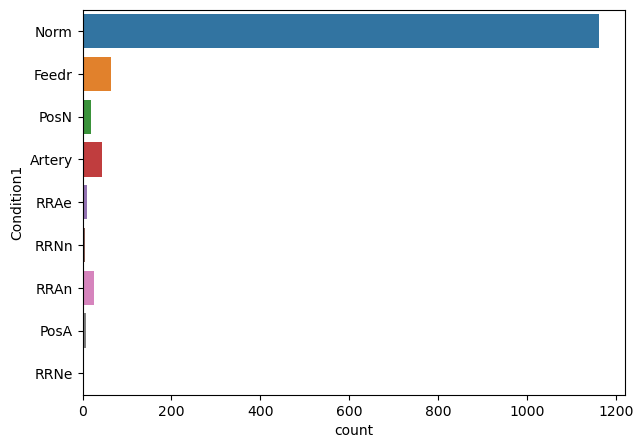

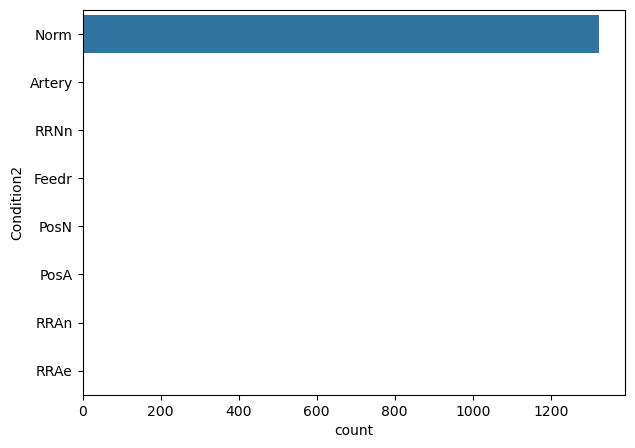

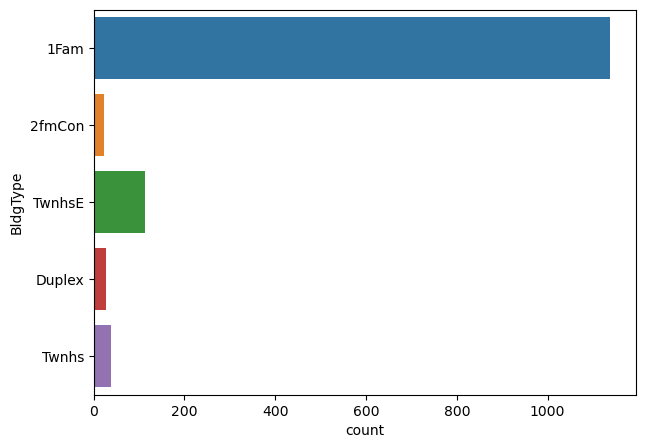

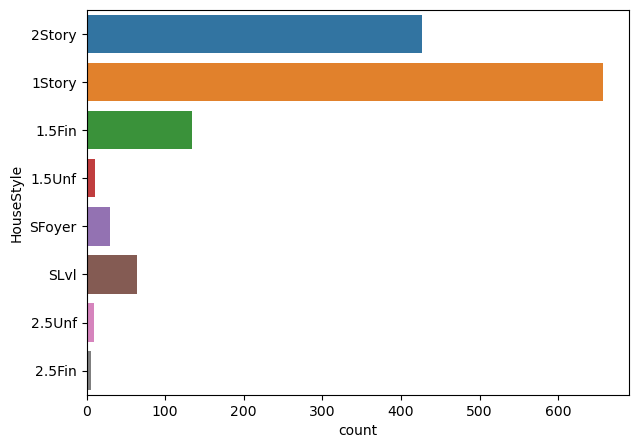

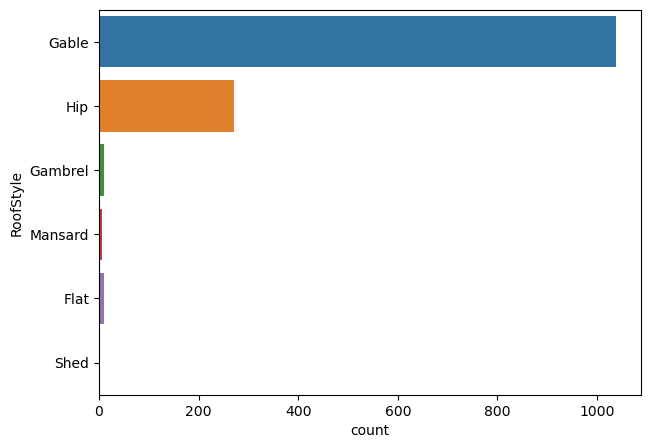

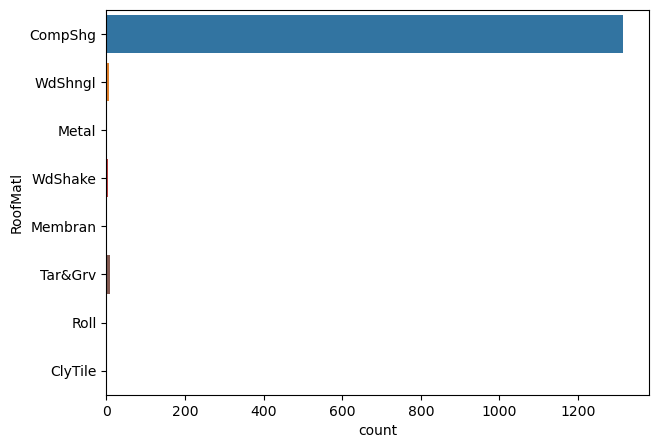

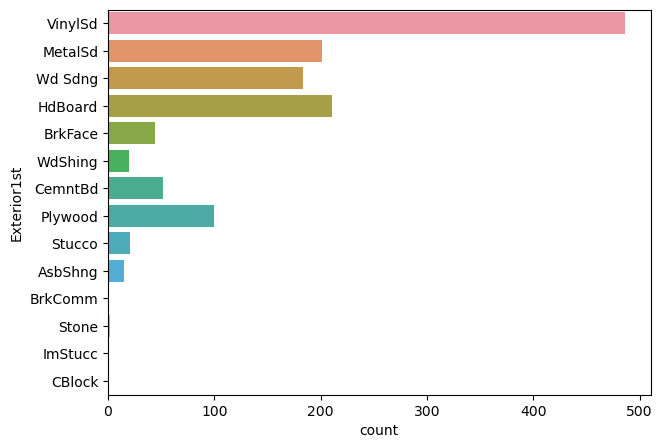

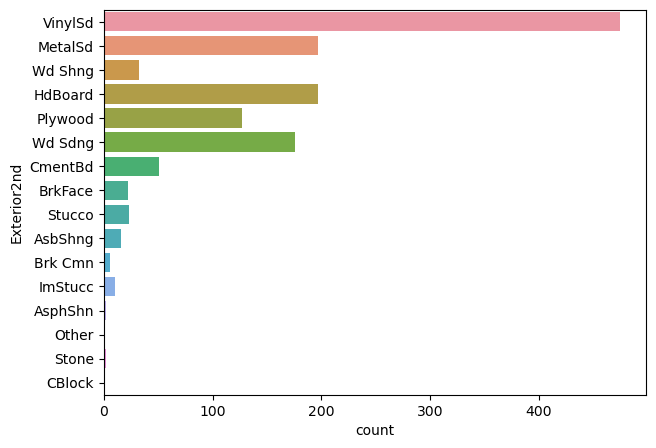

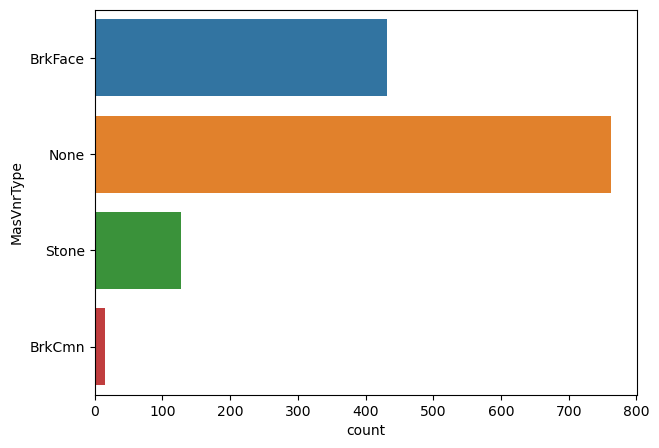

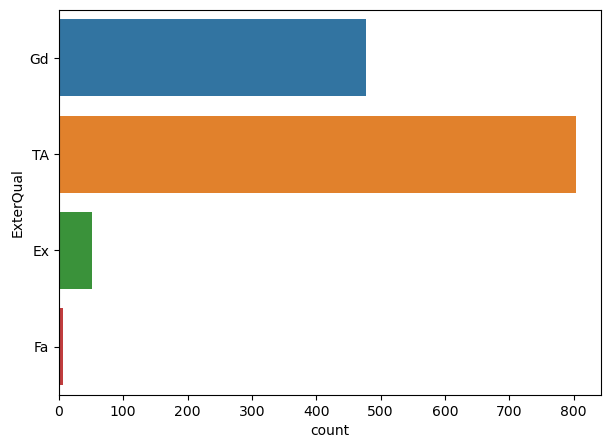

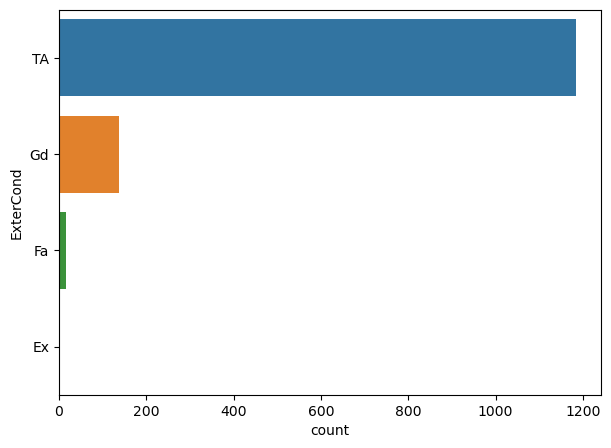

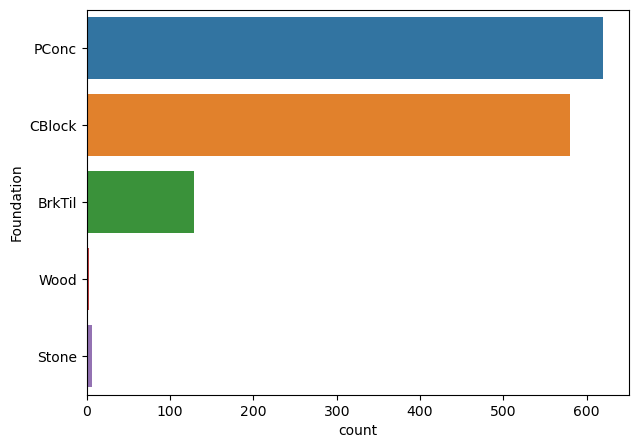

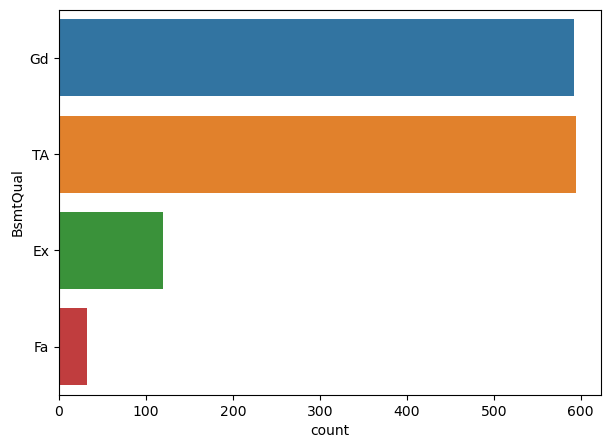

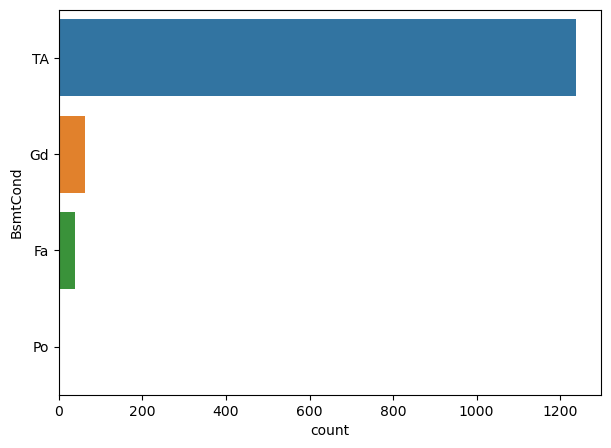

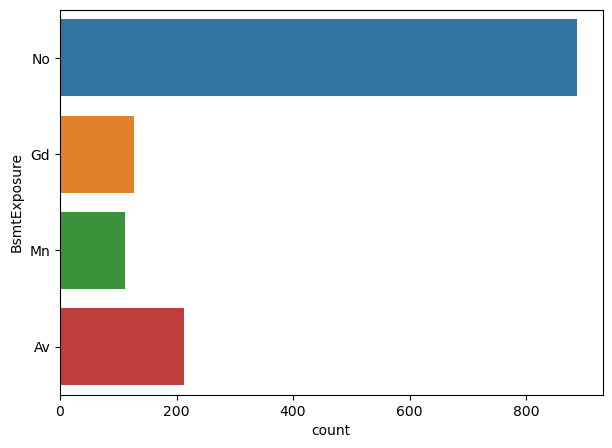

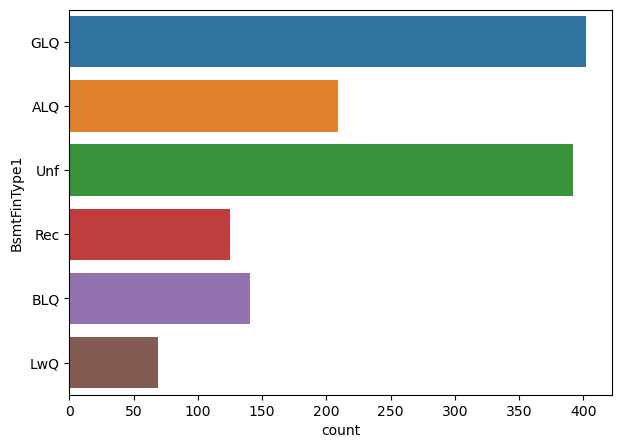

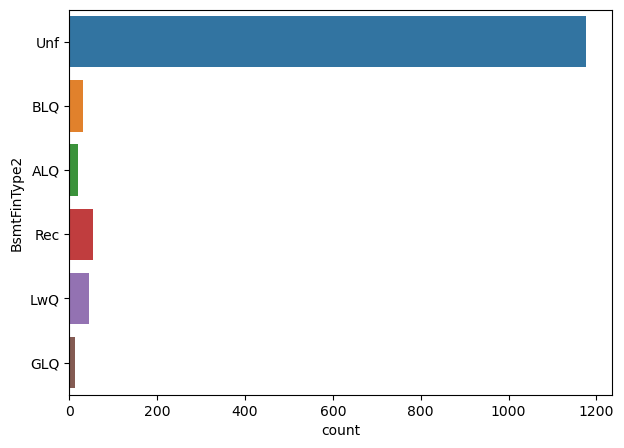

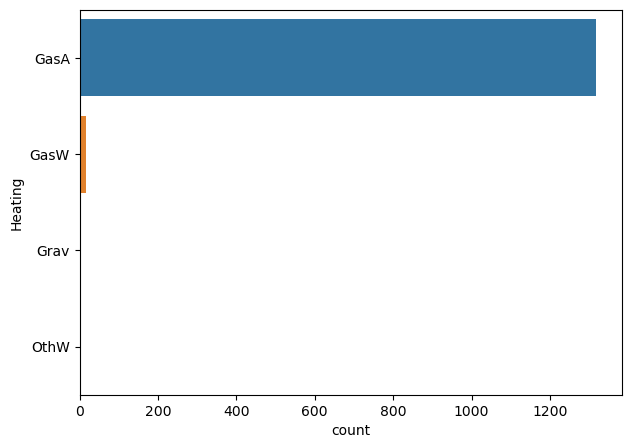

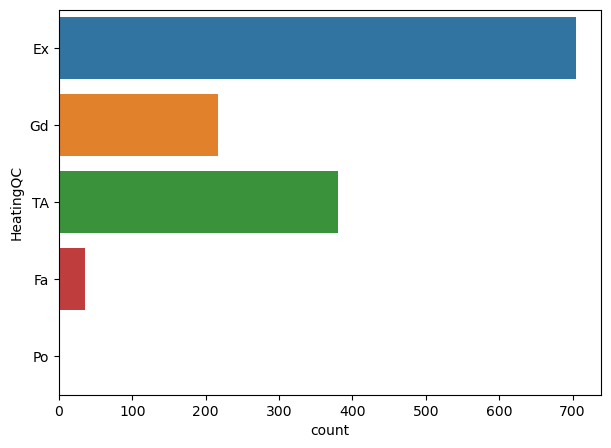

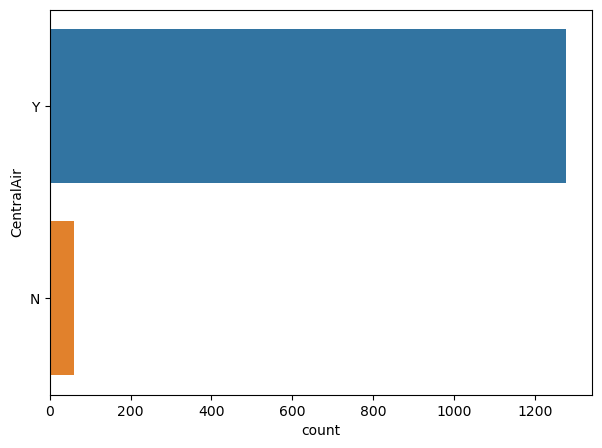

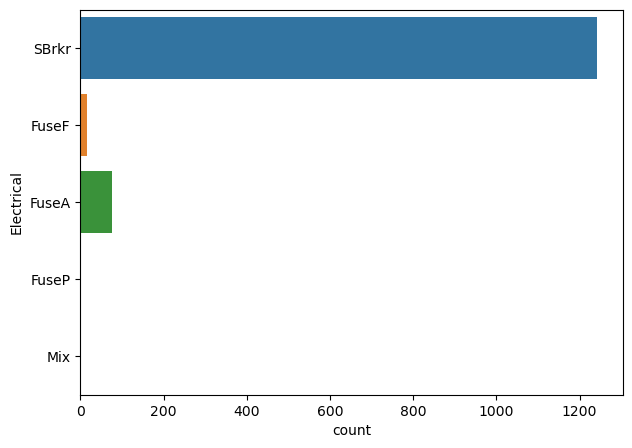

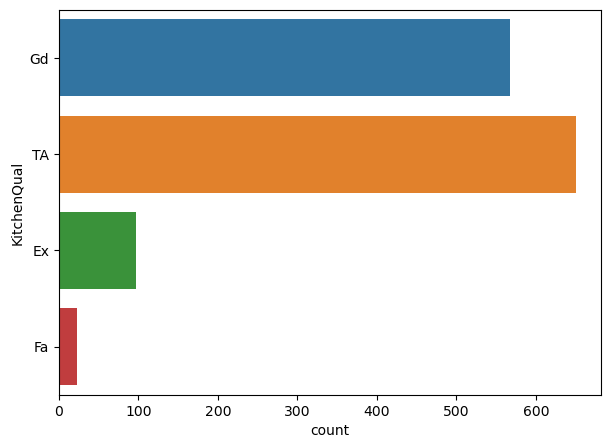

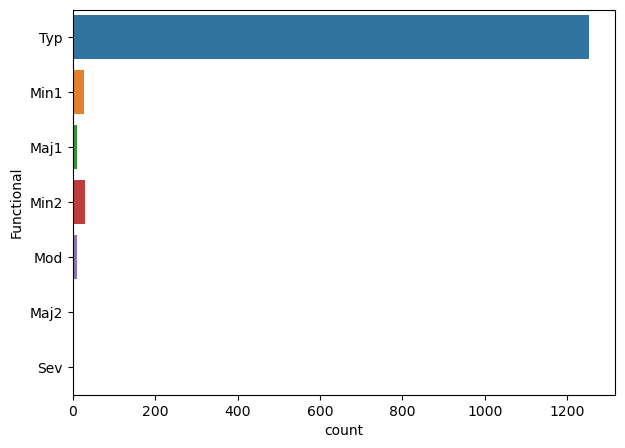

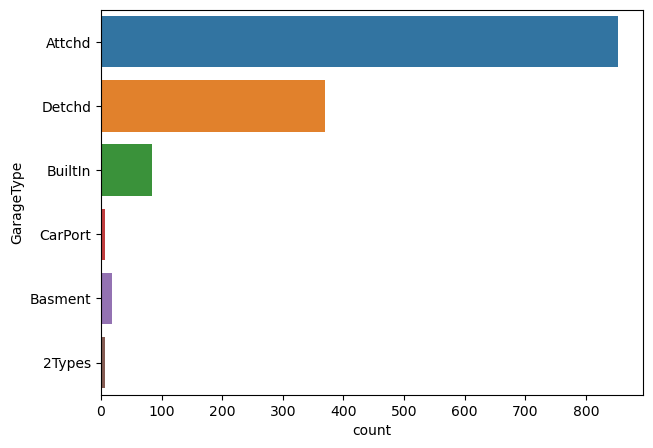

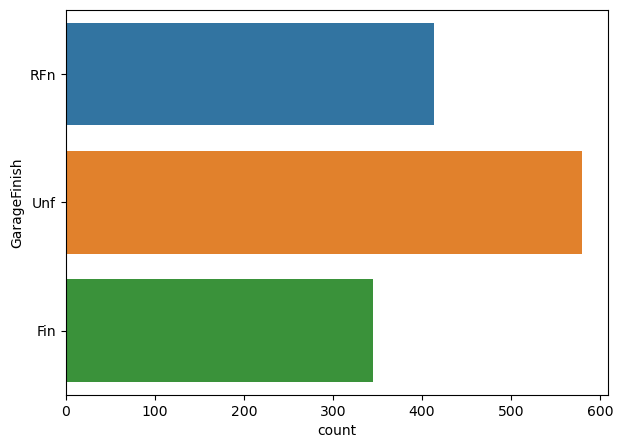

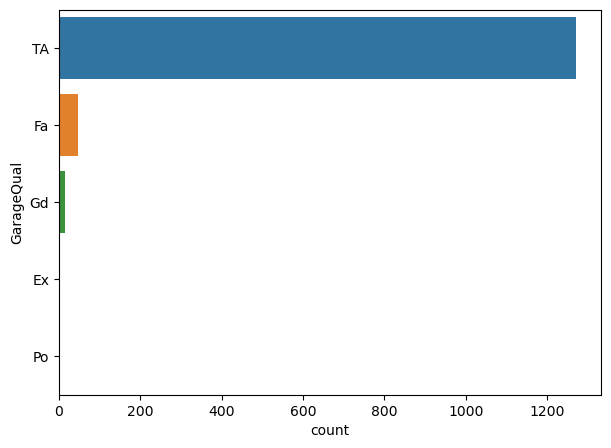

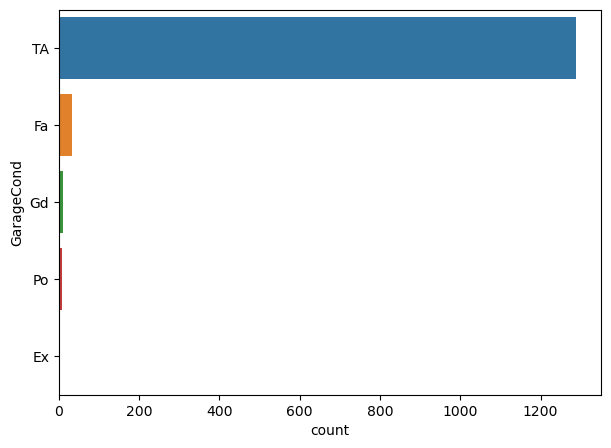

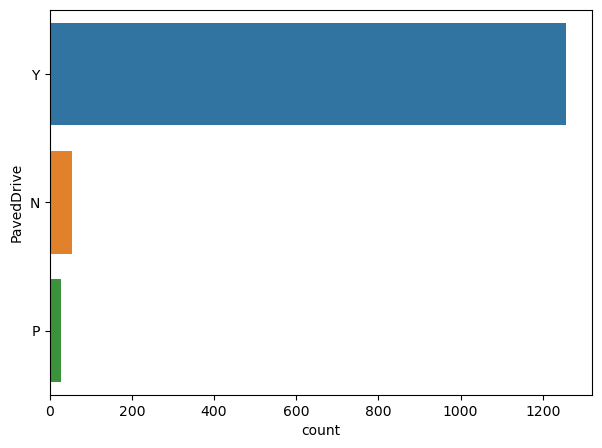

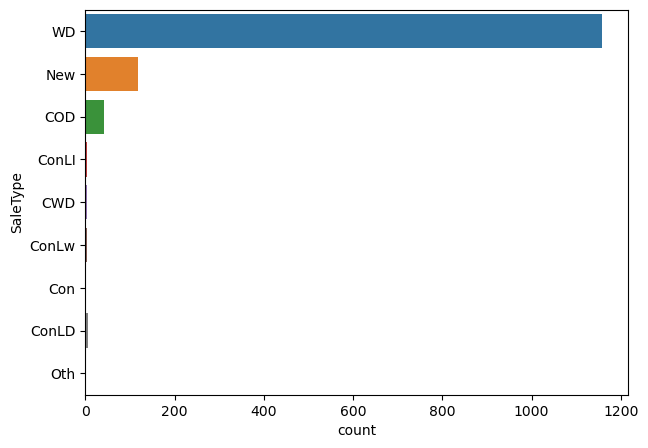

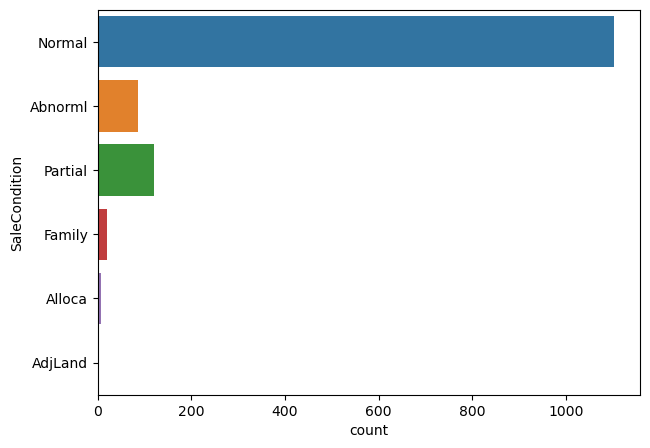

In [55]:
for col in cat_data:
     plt.figure(figsize=(7,5))
     sns.countplot(y= cat_data[col])
     plt.show()

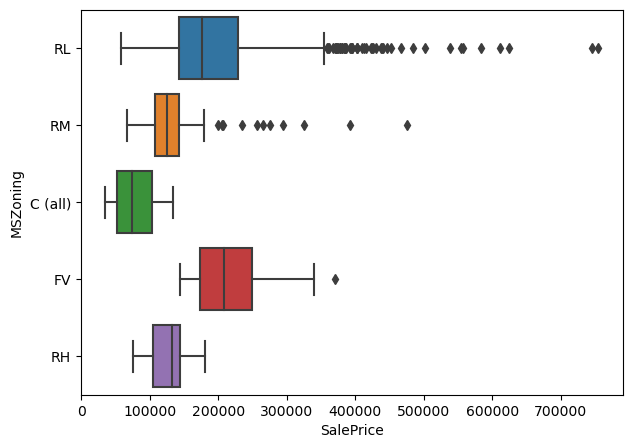

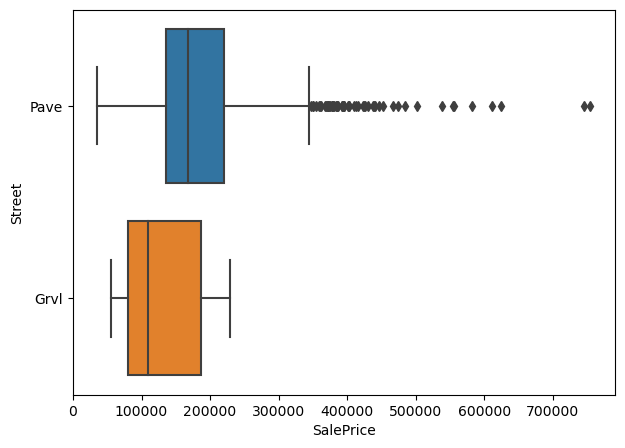

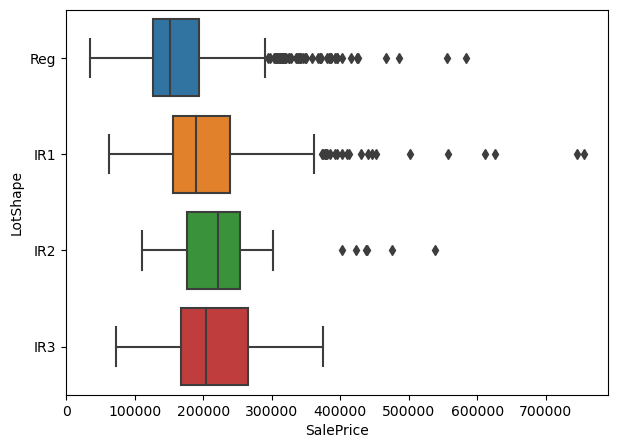

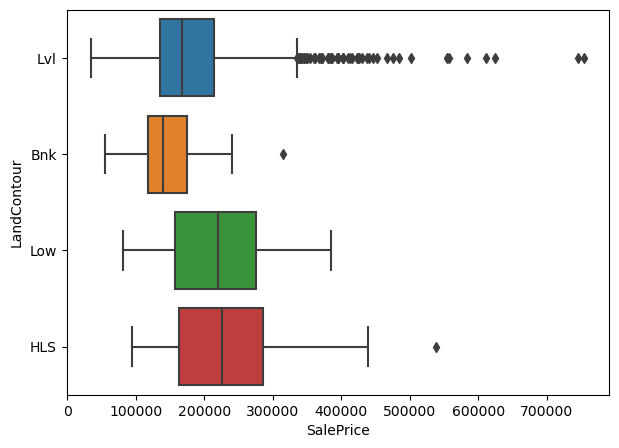

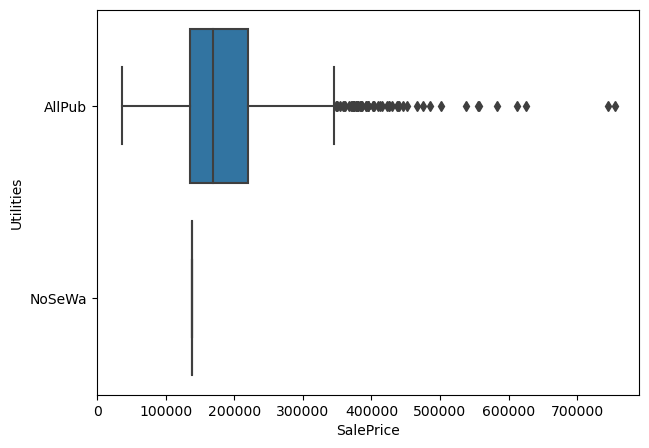

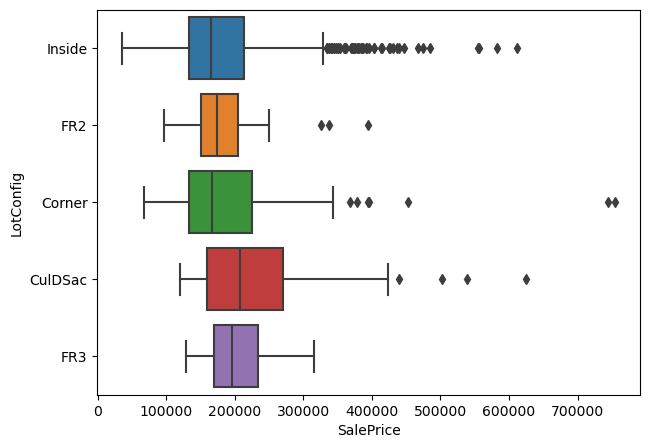

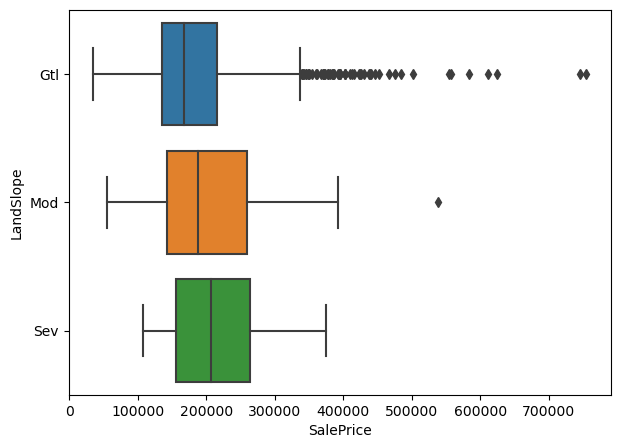

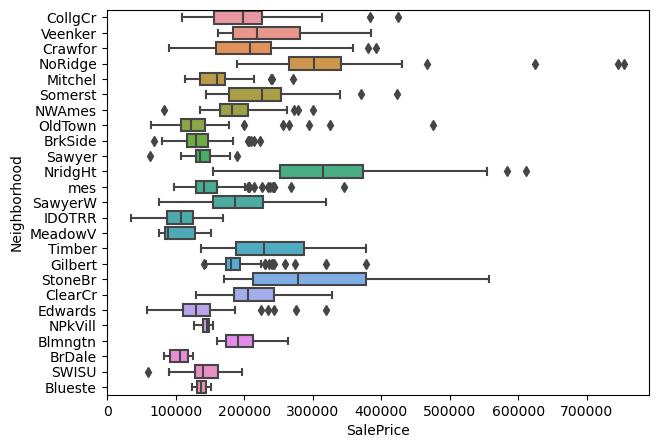

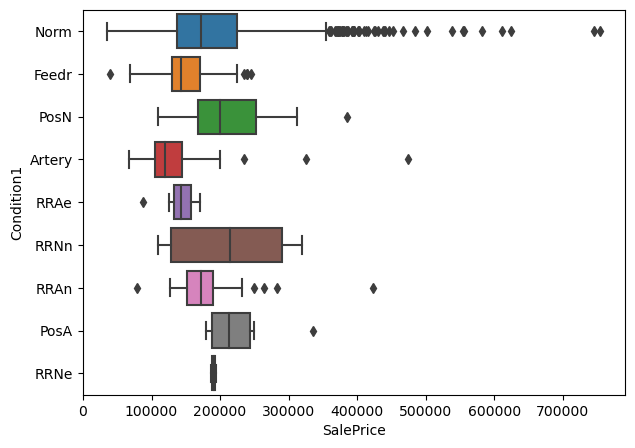

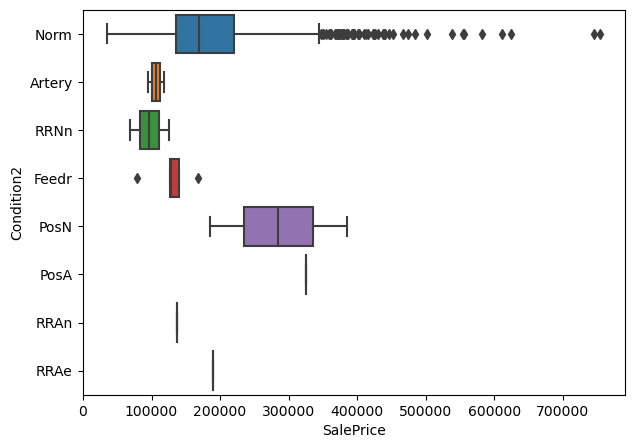

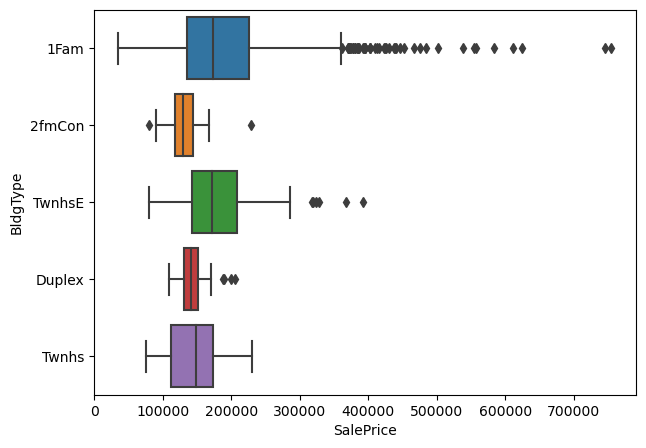

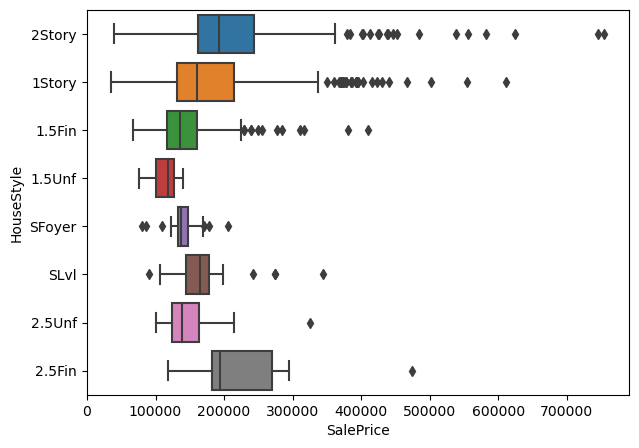

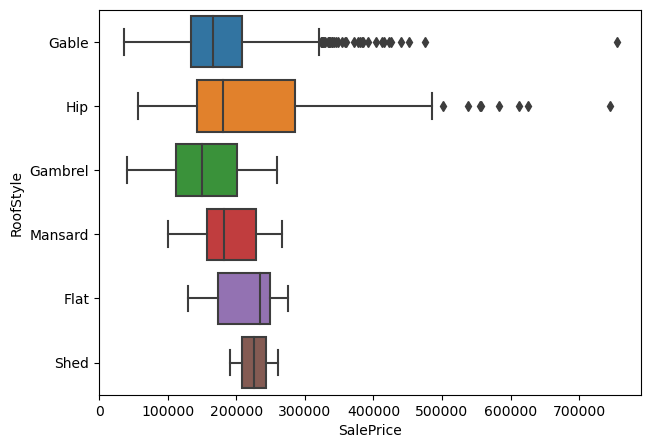

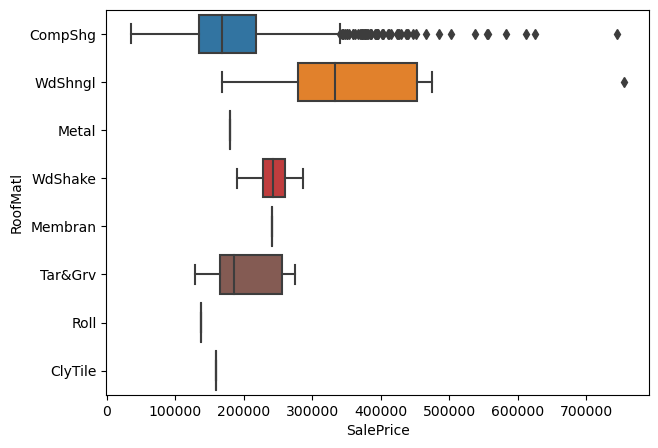

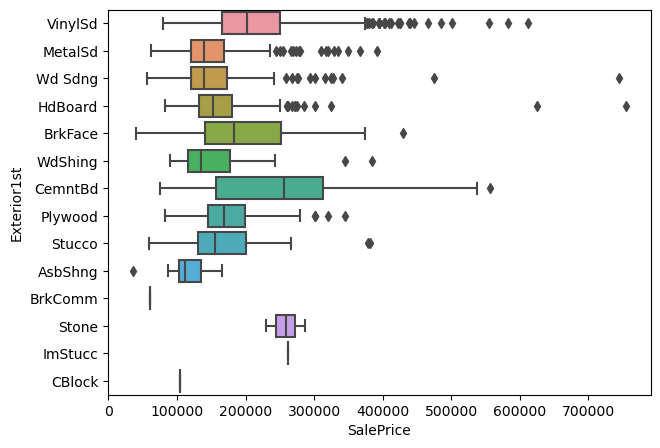

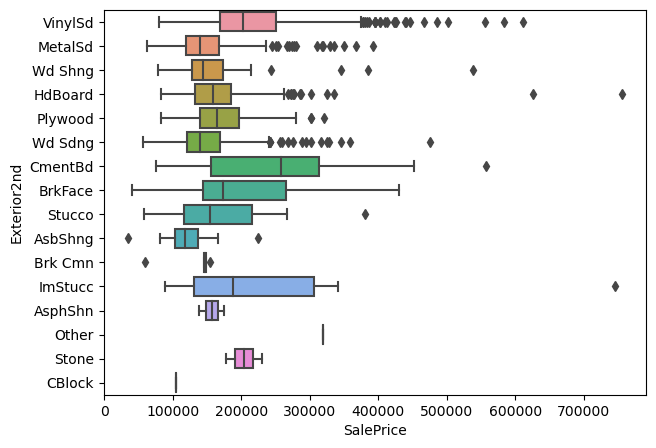

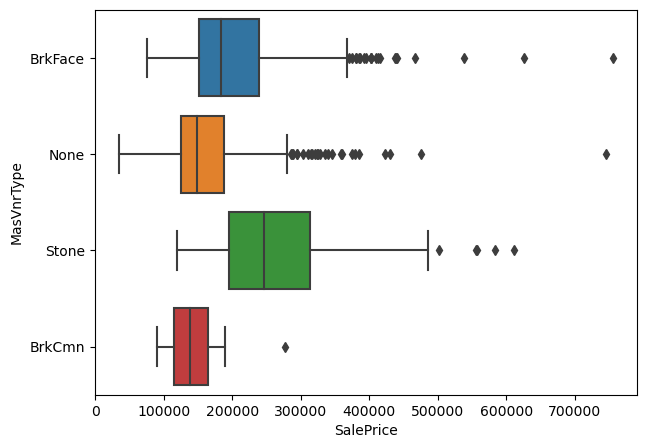

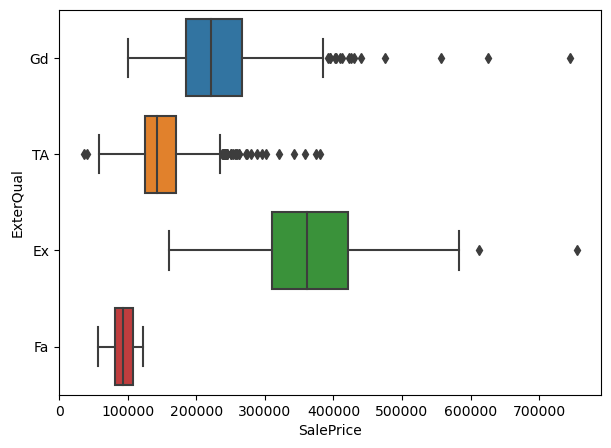

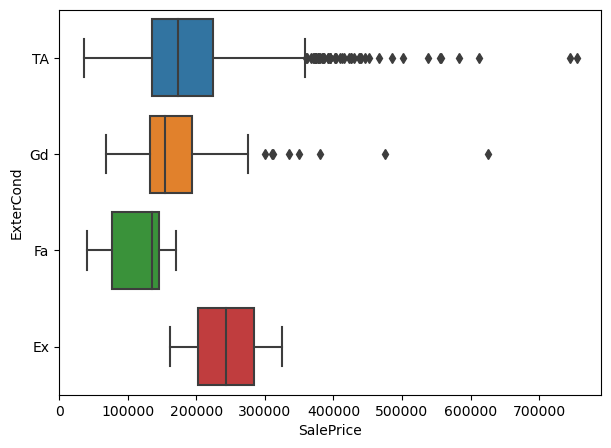

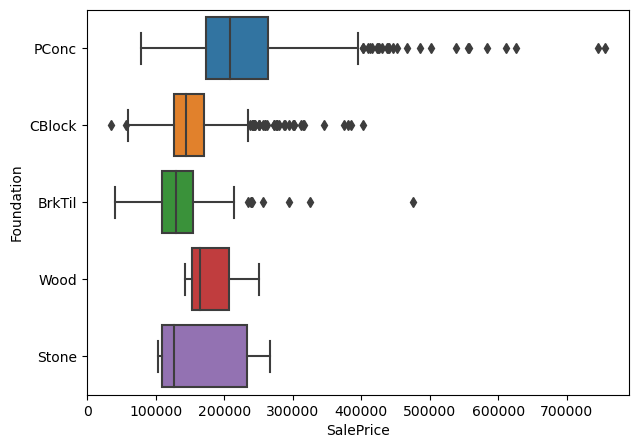

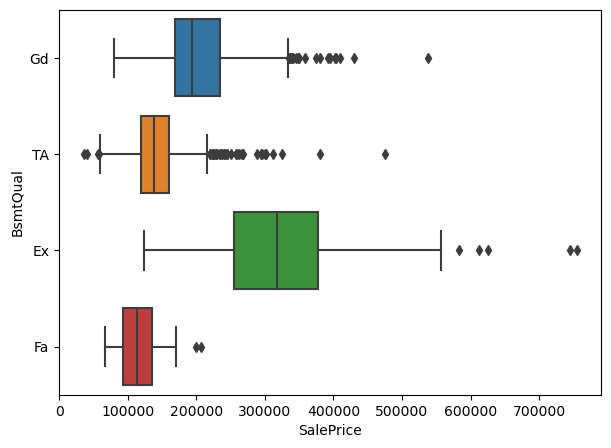

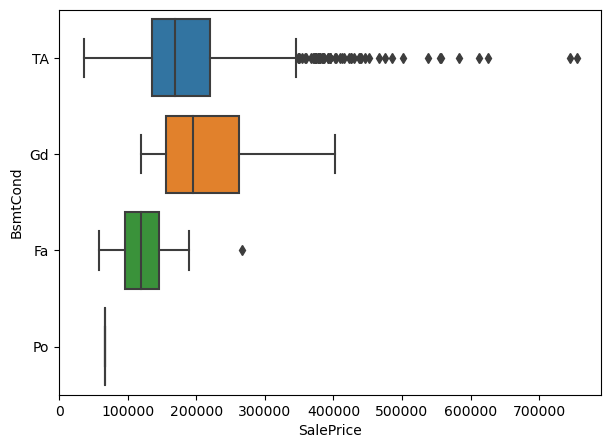

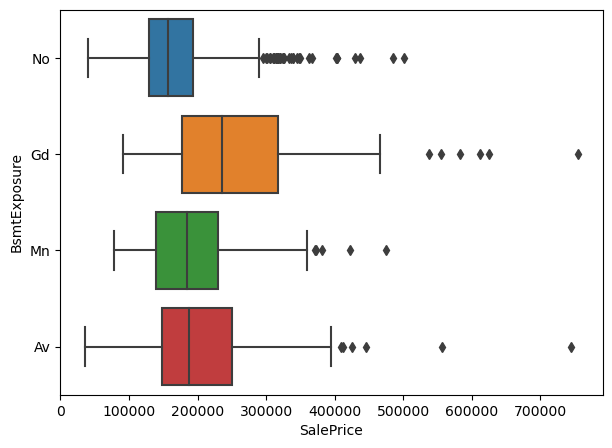

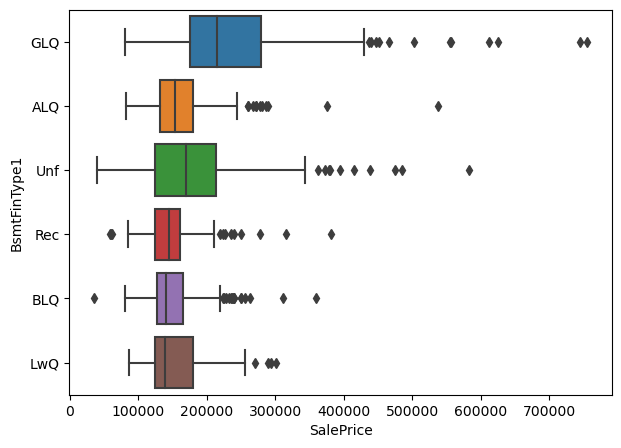

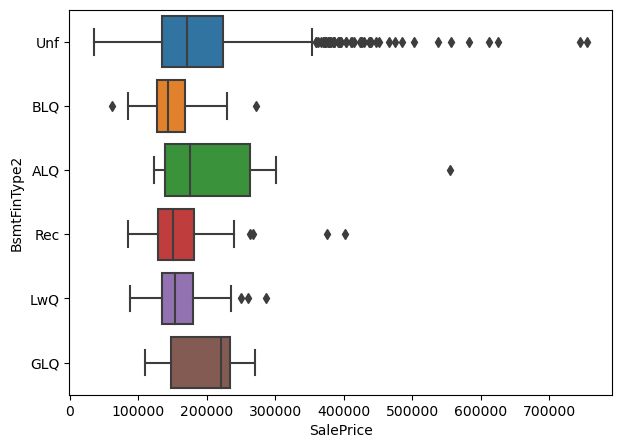

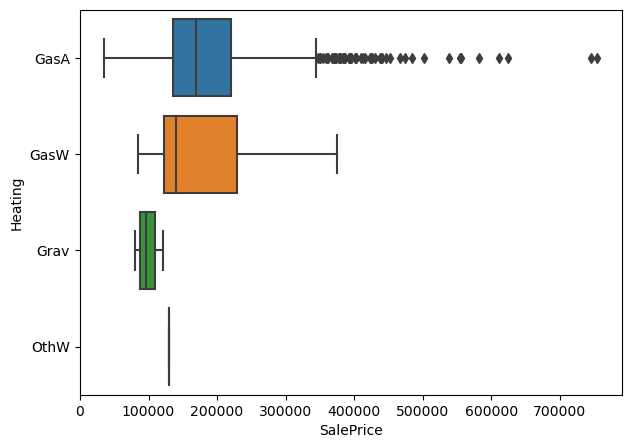

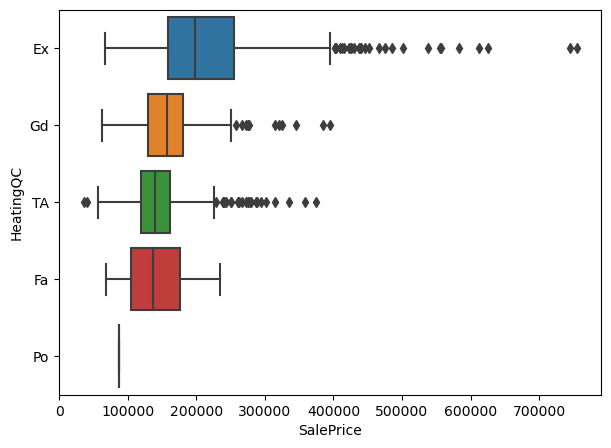

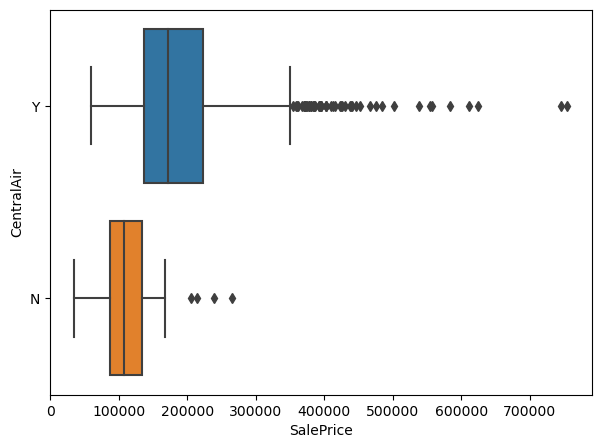

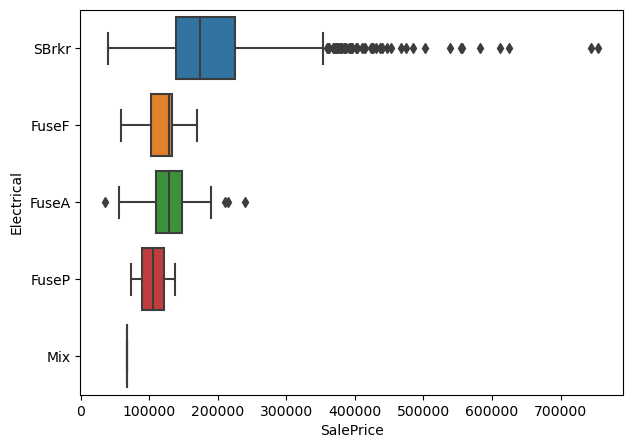

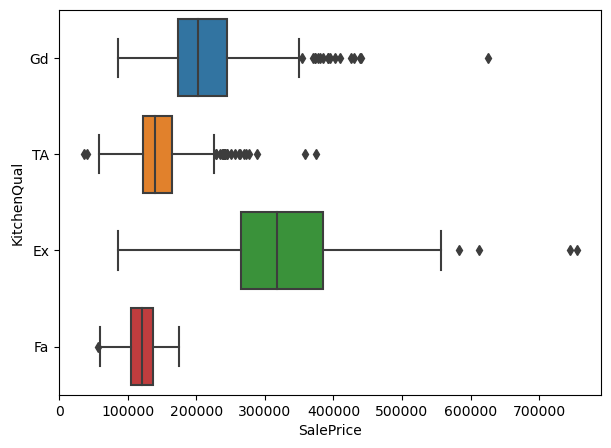

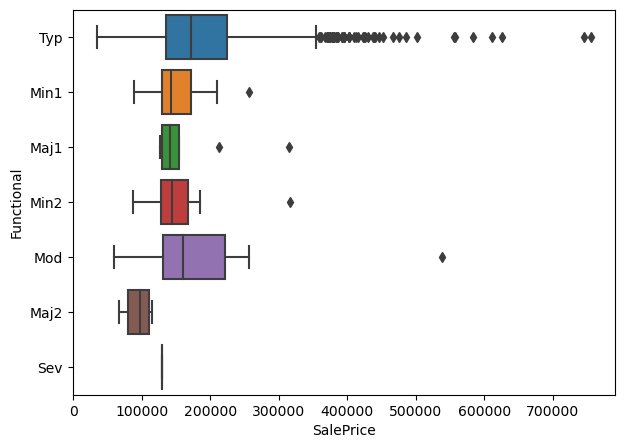

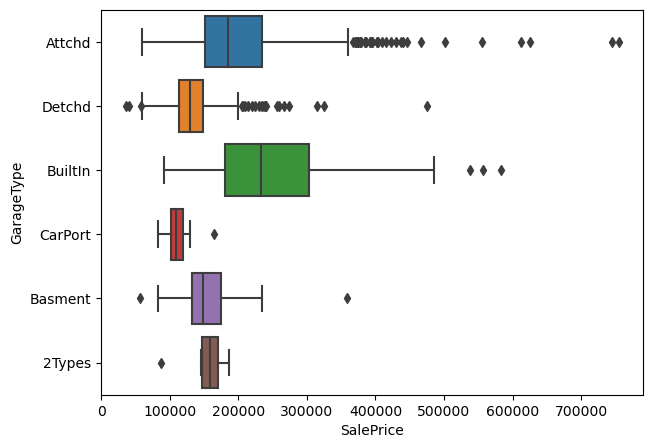

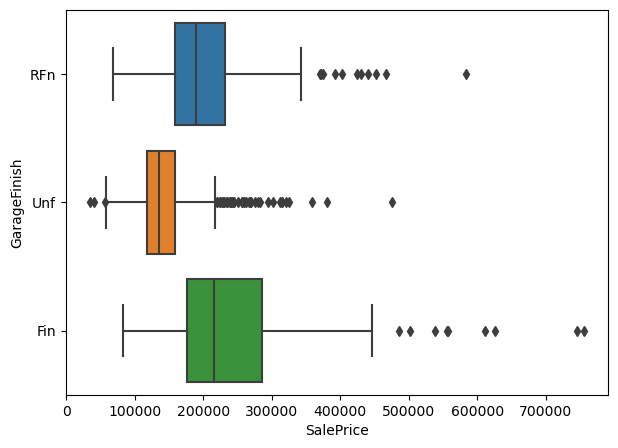

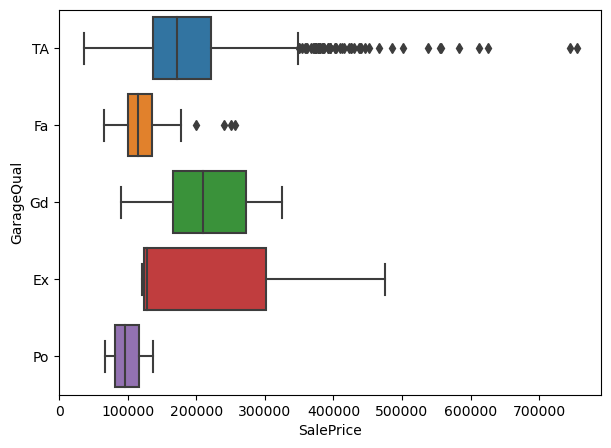

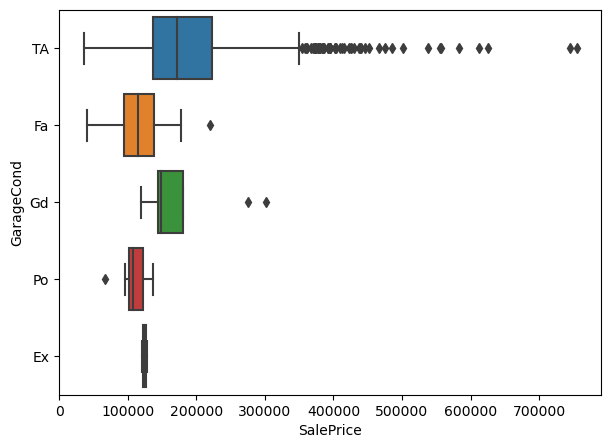

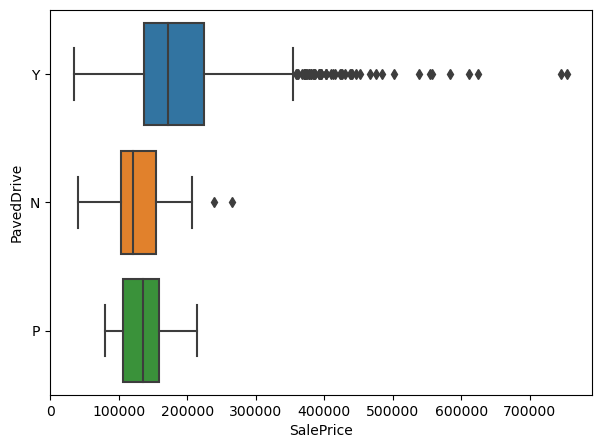

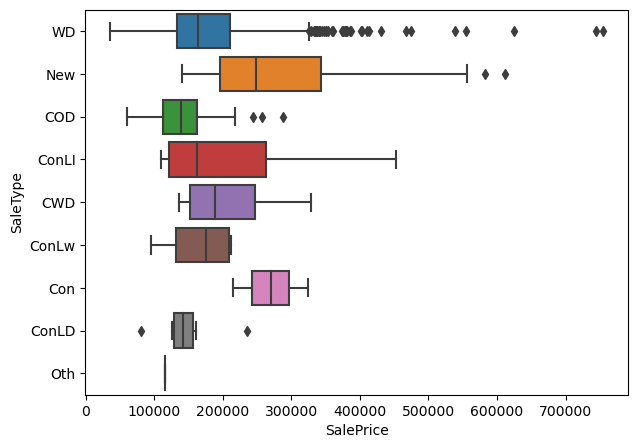

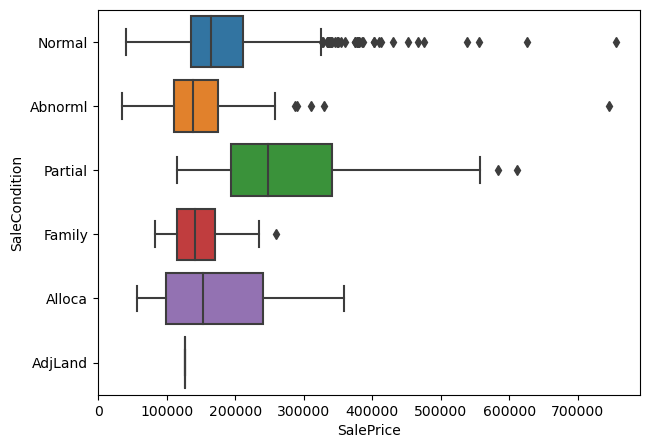

In [56]:
Y = num_data['SalePrice']
for col in cat_data:
     plt.figure(figsize=(7,5))
     sns.boxplot(x=Y,y=cat_data[col])
     plt.show()

# Basic Analysis 

### Getting columns names

In [57]:
cat_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

### Encoding categorical data

In [58]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
cat_data = ord_enc.fit_transform(cat_data)

### converting data into pandas DataFrame

In [59]:
cat_data = pd.DataFrame(cat_data)
cat_data.columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

In [60]:
cat_data.head()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0       3.0     1.0       3.0          3.0        0.0        4.0        0.0   
1       3.0     1.0       3.0          3.0        0.0        2.0        0.0   
2       3.0     1.0       0.0          3.0        0.0        4.0        0.0   
3       3.0     1.0       0.0          3.0        0.0        0.0        0.0   
4       3.0     1.0       0.0          3.0        0.0        2.0        0.0   

   Neighborhood  Condition1  Condition2  ...  Electrical  KitchenQual  \
0           5.0         2.0         2.0  ...         4.0          2.0   
1          23.0         1.0         2.0  ...         4.0          3.0   
2           5.0         2.0         2.0  ...         4.0          2.0   
3           6.0         2.0         2.0  ...         4.0          2.0   
4          14.0         2.0         2.0  ...         4.0          2.0   

   Functional  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0         6.0         1.0           1.0         4.0         4.0         2.0   
1         6.0         1.0           1.0         4.0         4.0         2.0   
2         6.0         1.0           1.0         4.0         4.0         2.0   
3         6.0         5.0           2.0         4.0         4.0         2.0   
4         6.0         1.0           1.0         4.0         4.0         2.0   

   SaleType  SaleCondition  
0       8.0            4.0  
1       8.0            4.0  
2       8.0            4.0  
3       8.0            0.0  
4       8.0            4.0  

[5 rows x 38 columns]

In [61]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1338 non-null   float64
 1   Street         1338 non-null   float64
 2   LotShape       1338 non-null   float64
 3   LandContour    1338 non-null   float64
 4   Utilities      1338 non-null   float64
 5   LotConfig      1338 non-null   float64
 6   LandSlope      1338 non-null   float64
 7   Neighborhood   1338 non-null   float64
 8   Condition1     1338 non-null   float64
 9   Condition2     1338 non-null   float64
 10  BldgType       1338 non-null   float64
 11  HouseStyle     1338 non-null   float64
 12  RoofStyle      1338 non-null   float64
 13  RoofMatl       1338 non-null   float64
 14  Exterior1st    1338 non-null   float64
 15  Exterior2nd    1338 non-null   float64
 16  MasVnrType     1338 non-null   float64
 17  ExterQual      1338 non-null   float64
 18  ExterCon

In [62]:
cat_data.describe()

MSZoning       Street     LotShape  LandContour    Utilities  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean      3.023916     0.996263     1.903587     2.787743     0.000747   
std       0.624383     0.061039     1.419114     0.687379     0.027338   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     1.000000     0.000000     3.000000     0.000000   
50%       3.000000     1.000000     3.000000     3.000000     0.000000   
75%       3.000000     1.000000     3.000000     3.000000     0.000000   
max       4.000000     1.000000     3.000000     3.000000     1.000000   

         LotConfig    LandSlope  Neighborhood   Condition1   Condition2  ...  \
count  1338.000000  1338.000000   1338.000000  1338.000000  1338.000000  ...   
mean      3.001495     0.063528     13.803438     2.053064     2.009716  ...   
std       1.630854     0.278365      7.139664     0.886714     0.269177  ...   
min       0.000000     0.000000      0.000000     0.000000     0.000000  ...   
25%       2.000000     0.000000      7.000000     2.000000     2.000000  ...   
50%       4.000000     0.000000     15.000000     2.000000     2.000000  ...   
75%       4.000000     0.000000     20.000000     2.000000     2.000000  ...   
max       4.000000     2.000000     24.000000     8.000000     7.000000  ...   

        Electrical  KitchenQual   Functional   GarageType  GarageFinish  \
count  1338.000000  1338.000000  1338.000000  1338.000000   1338.000000   
mean      3.730942     2.323617     5.772048     2.255605      1.175635   
std       0.978887     0.829916     0.928834     1.777147      0.813005   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       4.000000     2.000000     6.000000     1.000000      0.000000   
50%       4.000000     2.000000     6.000000     1.000000      1.000000   
75%       4.000000     3.000000     6.000000     5.000000      2.000000   
max       4.000000     3.000000     6.000000     5.000000      2.000000   

        GarageQual   GarageCond   PavedDrive     SaleType  SaleCondition  
count  1338.000000  1338.000000  1338.000000  1338.000000    1338.000000  
mean      3.860239     3.901345     1.899103     7.500000       3.804933  
std       0.619349     0.518165     0.414201     1.580666       1.059942  
min       0.000000     0.000000     0.000000     0.000000       0.000000  
25%       4.000000     4.000000     2.000000     8.000000       4.000000  
50%       4.000000     4.000000     2.000000     8.000000       4.000000  
75%       4.000000     4.000000     2.000000     8.000000       4.000000  
max       4.000000     4.000000     2.000000     8.000000       5.000000  

[8 rows x 38 columns]

# Identify significant variables using p-values and Chi-Square values

### Adding SalePrice to cat_data

In [63]:
cat_data['SalePrice'] = data.loc[cat_data.index, 'SalePrice'].copy()
cat_data.head()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0       3.0     1.0       3.0          3.0        0.0        4.0        0.0   
1       3.0     1.0       3.0          3.0        0.0        2.0        0.0   
2       3.0     1.0       0.0          3.0        0.0        4.0        0.0   
3       3.0     1.0       0.0          3.0        0.0        0.0        0.0   
4       3.0     1.0       0.0          3.0        0.0        2.0        0.0   

   Neighborhood  Condition1  Condition2  ...  KitchenQual  Functional  \
0           5.0         2.0         2.0  ...          2.0         6.0   
1          23.0         1.0         2.0  ...          3.0         6.0   
2           5.0         2.0         2.0  ...          2.0         6.0   
3           6.0         2.0         2.0  ...          2.0         6.0   
4          14.0         2.0         2.0  ...          2.0         6.0   

   GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  SaleType  \
0         1.0           1.0         4.0         4.0         2.0       8.0   
1         1.0           1.0         4.0         4.0         2.0       8.0   
2         1.0           1.0         4.0         4.0         2.0       8.0   
3         5.0           2.0         4.0         4.0         2.0       8.0   
4         1.0           1.0         4.0         4.0         2.0       8.0   

   SaleCondition  SalePrice  
0            4.0     208500  
1            4.0     181500  
2            4.0     223500  
3            0.0     140000  
4            4.0     250000  

[5 rows x 39 columns]

### Function to get p_value and chi_square test, then a list of signifivant variables

In [64]:
class ChiSquare:
#Function to determine p-value and perform chi-square test
    def __init__(self, dataframe):
        self.data = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi-square Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        global sig_cat
        sig_cat = list()

#Function to print the results of p-value and chi-square test     
    def _print_chisquare_result(self, colX, alpha):

        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
            sig_cat.append(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)
        print(result)
    
#Function to determine chi-square and p-value less than or equal to 0.05
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.data[colX].astype(str)
        Y = self.data[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)


In [65]:
#Initializing ChiSquare Class
cT = ChiSquare(cat_data)
#Perform Feature Selection
testColumns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="SalePrice" ) 


MSZoning is IMPORTANT for Prediction
Street is NOT an important predictor. (Discard Street from model)
LotShape is NOT an important predictor. (Discard LotShape from model)
LandContour is NOT an important predictor. (Discard LandContour from model)
Utilities is NOT an important predictor. (Discard Utilities from model)
LotConfig is IMPORTANT for Prediction
LandSlope is NOT an important predictor. (Discard LandSlope from model)
Neighborhood is NOT an important predictor. (Discard Neighborhood from model)
Condition1 is NOT an important predictor. (Discard Condition1 from model)
Condition2 is IMPORTANT for Prediction
BldgType is NOT an important predictor. (Discard BldgType from model)
HouseStyle is IMPORTANT for Prediction
RoofStyle is NOT an important predictor. (Discard RoofStyle from model)
RoofMatl is NOT an important predictor. (Discard RoofMatl from model)
Exterior1st is IMPORTANT for Prediction
Exterior2nd is IMPORTANT for Prediction
MasVnrType is NOT an important predictor. (Disc


# Significant Categorical Data:

In [66]:
sig_cat

['MSZoning',
 'LotConfig',
 'Condition2',
 'HouseStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'BsmtCond',
 'BsmtExposure',
 'Heating',
 'CentralAir',
 'Electrical',
 'PavedDrive']

# creating a separate dataset for only significant categorical data

In [79]:
sig_cat_data = cat_data[sig_cat]
sig_cat_data['SalePrice']  = cat_data.loc[sig_cat_data.index, 'SalePrice']

In [80]:
sig_cat_data.head()

MSZoning  LotConfig  Condition2  HouseStyle  Exterior1st  Exterior2nd  \
0       3.0        4.0         2.0         5.0         11.0         13.0   
1       3.0        2.0         2.0         2.0          7.0          8.0   
2       3.0        4.0         2.0         5.0         11.0         13.0   
3       3.0        0.0         2.0         5.0         12.0         15.0   
4       3.0        2.0         2.0         5.0         11.0         13.0   

   ExterQual  ExterCond  BsmtCond  BsmtExposure  Heating  CentralAir  \
0        2.0        3.0       3.0           3.0      0.0         1.0   
1        3.0        3.0       3.0           1.0      0.0         1.0   
2        2.0        3.0       3.0           2.0      0.0         1.0   
3        3.0        3.0       1.0           3.0      0.0         1.0   
4        2.0        3.0       3.0           0.0      0.0         1.0   

   Electrical  PavedDrive  SalePrice  
0         4.0         2.0     208500  
1         4.0         2.0     181500  
2         4.0         2.0     223500  
3         4.0         2.0     140000  
4         4.0         2.0     250000

# Combine all the significant categorical and numerical variables

In [82]:
sig_data = pd.merge(sig_num_data, sig_cat_data, how="outer", on=["SalePrice"])

In [83]:
sig_data.head()

OverallQual  YearBuilt  TotalBsmtSF  GrLivArea  GarageCars  SalePrice  \
0          7.0     2003.0        856.0     1710.0         2.0     208500   
1          6.0     1976.0       1262.0     1262.0         2.0     181500   
2          7.0     2001.0        920.0     1786.0         2.0     223500   
3          7.0     2001.0        920.0     1786.0         2.0     223500   
4          5.0     1923.0       1324.0     1576.0         2.0     223500   

   MSZoning  LotConfig  Condition2  HouseStyle  Exterior1st  Exterior2nd  \
0       3.0        4.0         2.0         5.0         11.0         13.0   
1       3.0        2.0         2.0         2.0          7.0          8.0   
2       3.0        4.0         2.0         5.0         11.0         13.0   
3       3.0        4.0         2.0         5.0         11.0         13.0   
4       3.0        4.0         2.0         5.0         11.0         13.0   

   ExterQual  ExterCond  BsmtCond  BsmtExposure  Heating  CentralAir  \
0        2.0        3.0       3.0           3.0      0.0         1.0   
1        3.0        3.0       3.0           1.0      0.0         1.0   
2        2.0        3.0       3.0           2.0      0.0         1.0   
3        2.0        3.0       3.0           3.0      0.0         1.0   
4        2.0        3.0       3.0           2.0      0.0         1.0   

   Electrical  PavedDrive  
0         4.0         2.0  
1         4.0         2.0  
2         4.0         2.0  
3         4.0         2.0  
4         4.0         2.0

# Plot box plot for the new dataset to find the variables with outliers

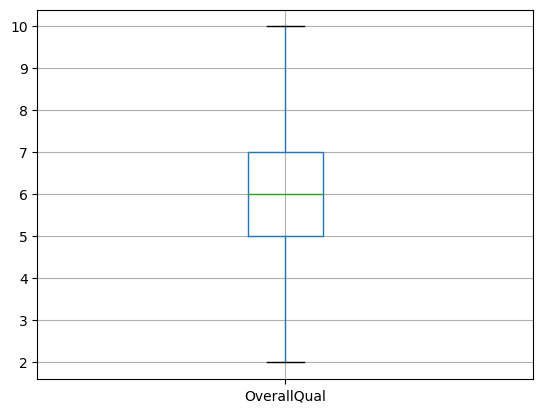

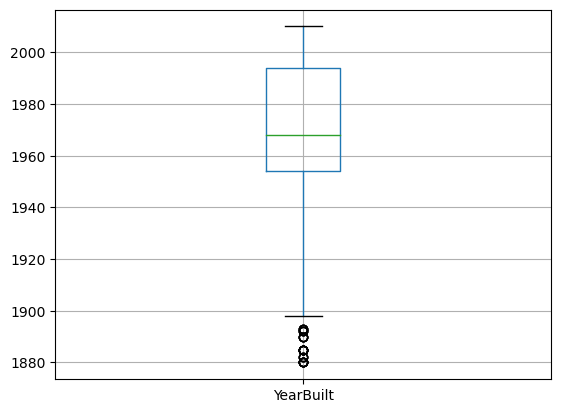

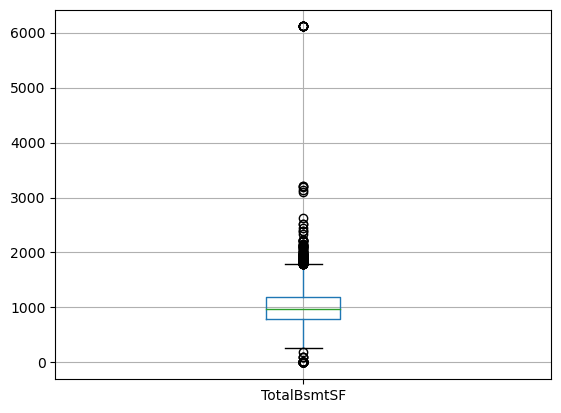

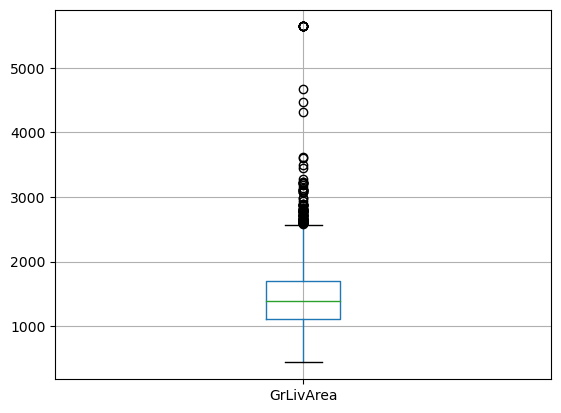

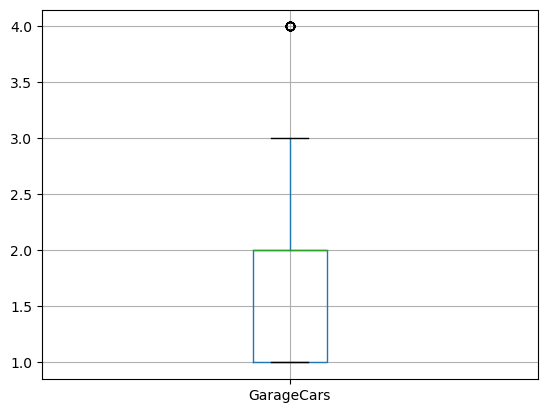

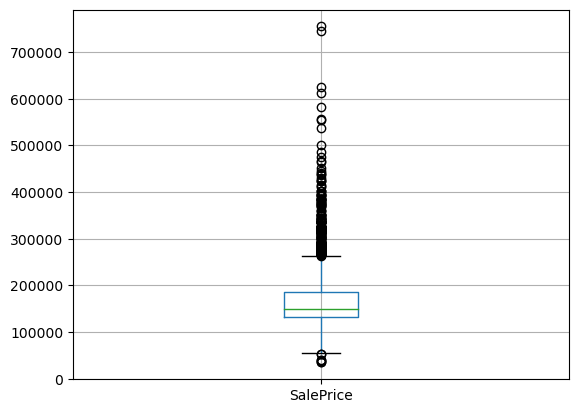

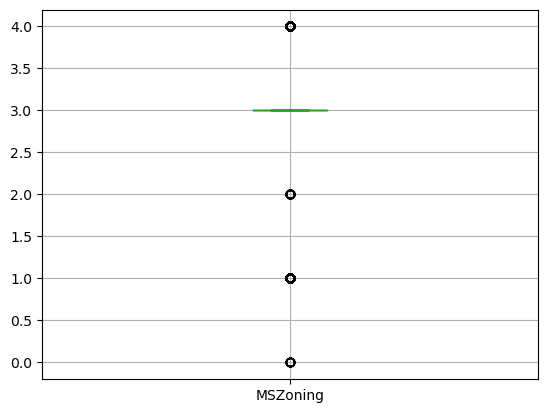

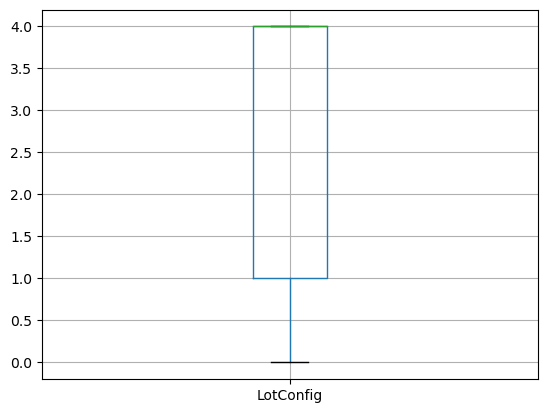

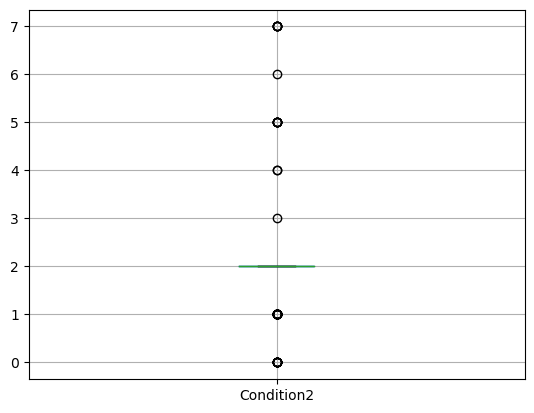

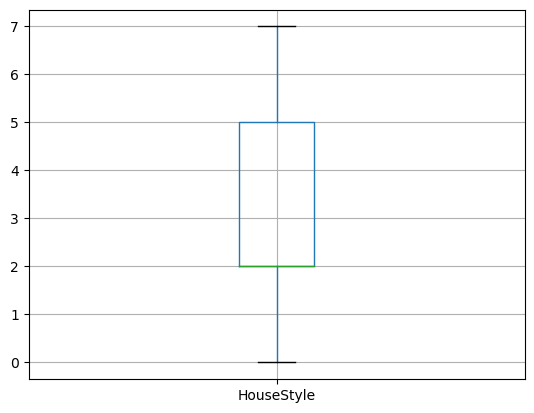

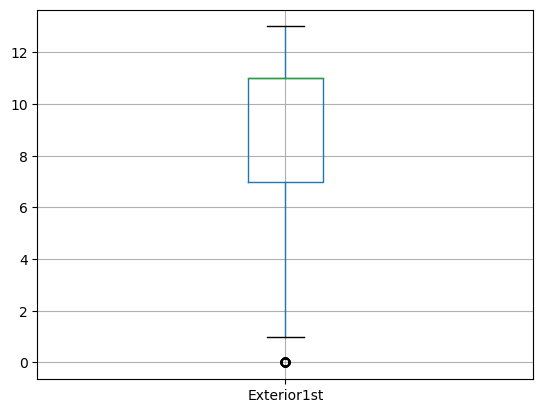

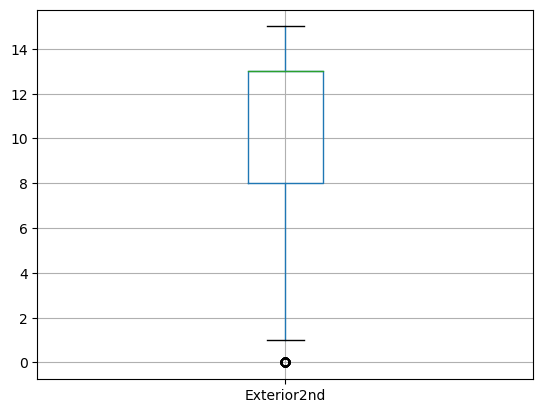

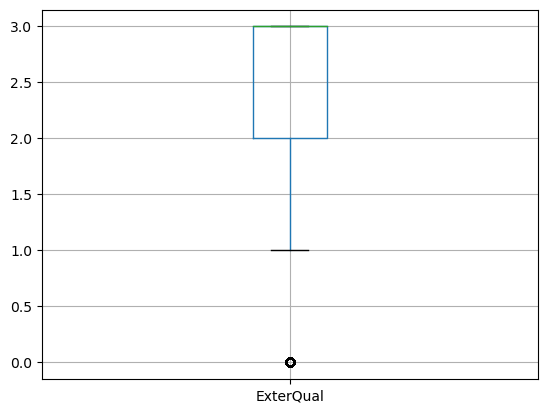

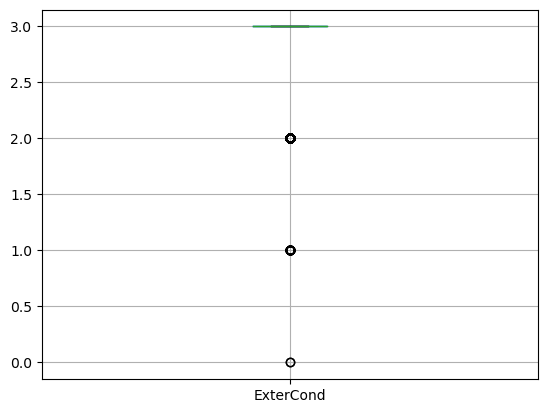

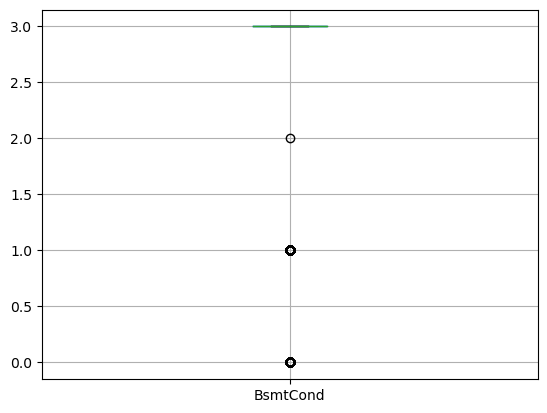

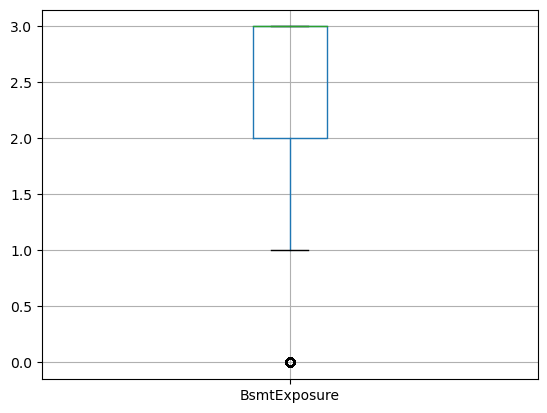

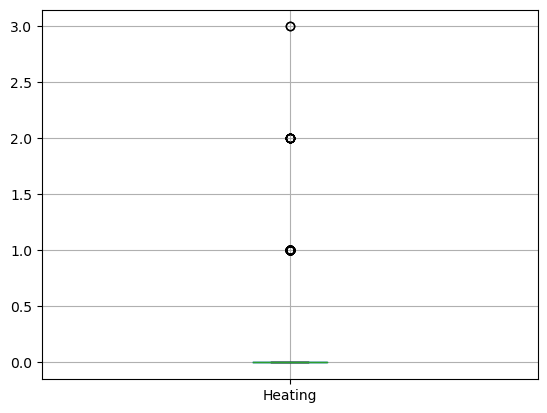

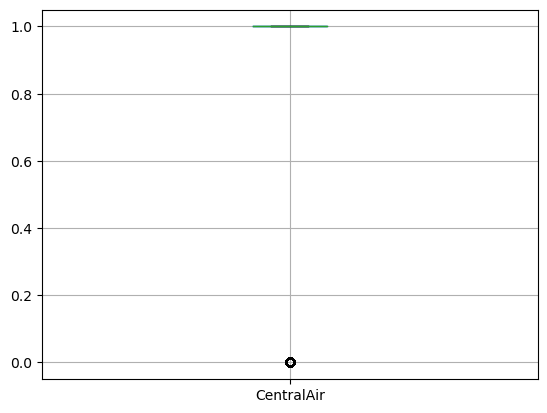

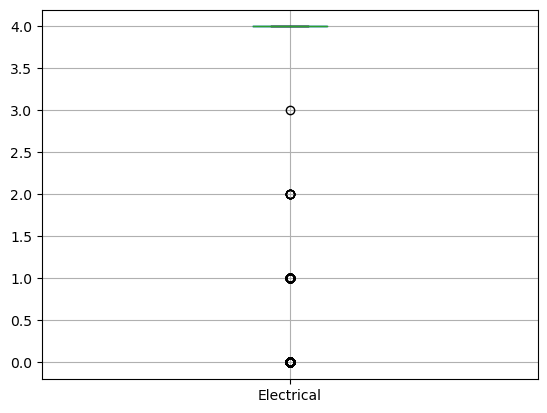

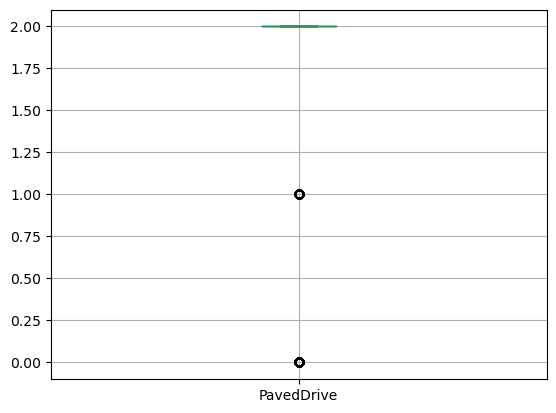

In [86]:
for column in sig_data:
    plt.figure()
    sig_data.boxplot([column])

###### Observation:
    - Most of the variables have outliers.